In [2]:
# Necessitam instal·lar la llibreria Dedalus així que aquest document servirà de prova.


# Aquest comentari és per provar de crear una "branch" nova a git i ajuntar-la a la "main" per veure si funciona. El que vull originalment és
# canviar el nom d'aquest codi

In [3]:
import numpy as np
from IPython.display import Image, display

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload

# The Kuramoto Sivashinksy
PDE no lineal relacionada amb l'equació de Burguers:

$ \frac{\partial u}{\partial t} + \frac{\partial^4 u}{\partial x^4} + \nu \frac{\partial^2 u}{\partial x^2} + u\frac{\partial u}{\partial x} = 0 $

2025-04-16 18:04:35,062 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.8e+01/s


/Users/joanribot/opt/anaconda3/envs/dedalus3/lib/python3.12/site-packages/dedalus/core/arithmetic.py:866: RuntimeWarning: overflow encountered in multiply
  np.multiply(arg0_exp_data, arg1_exp_data, out=out.data)


2025-04-16 18:04:40,993 __main__ 0/1 INFO :: Iteration=5000, Time=1.000000e+01, dt=2.000000e-03
2025-04-16 18:04:44,363 __main__ 0/1 INFO :: Iteration=10000, Time=2.000000e+01, dt=2.000000e-03
2025-04-16 18:04:47,593 __main__ 0/1 INFO :: Iteration=15000, Time=3.000000e+01, dt=2.000000e-03
2025-04-16 18:04:50,558 __main__ 0/1 INFO :: Iteration=20000, Time=4.000000e+01, dt=2.000000e-03
2025-04-16 18:04:53,092 __main__ 0/1 INFO :: Iteration=25000, Time=5.000000e+01, dt=2.000000e-03
2025-04-16 18:04:55,570 __main__ 0/1 INFO :: Iteration=30000, Time=6.000000e+01, dt=2.000000e-03
2025-04-16 18:04:58,036 __main__ 0/1 INFO :: Iteration=35000, Time=7.000000e+01, dt=2.000000e-03
2025-04-16 18:05:00,462 __main__ 0/1 INFO :: Iteration=40000, Time=8.000000e+01, dt=2.000000e-03
2025-04-16 18:05:02,874 __main__ 0/1 INFO :: Iteration=45000, Time=9.000000e+01, dt=2.000000e-03
2025-04-16 18:05:05,298 __main__ 0/1 INFO :: Iteration=50000, Time=1.000000e+02, dt=2.000000e-03
2025-04-16 18:05:07,728 __main_

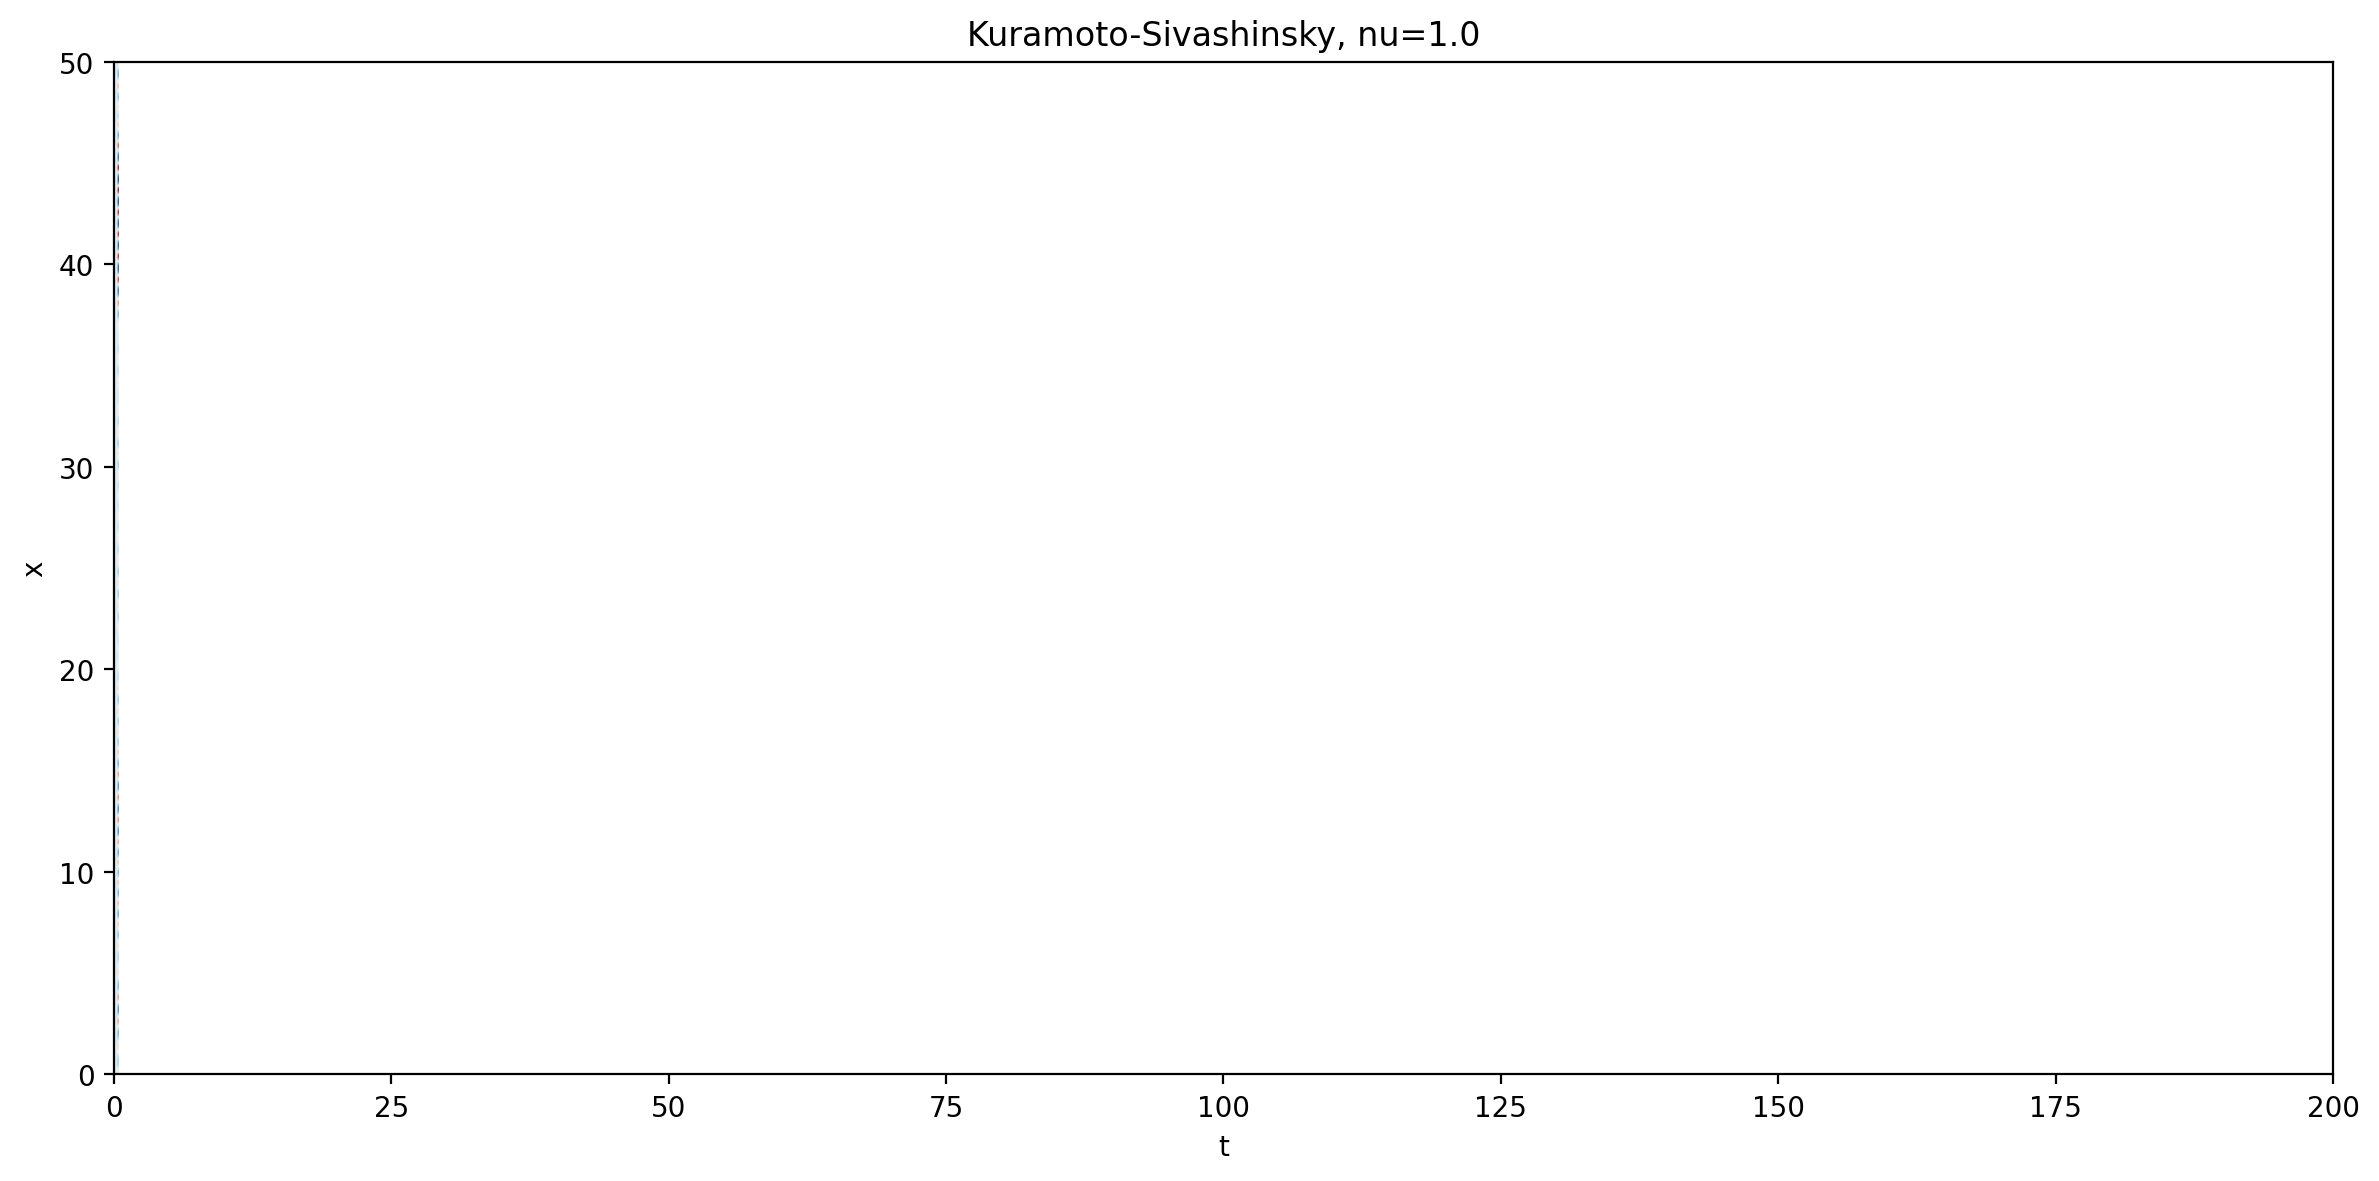

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)

## Specify simulation parameters
Lx = 50
Nx = 1024
nu = 1e0
dealias = 3/2
stop_sim_time = 200
timestepper = d3.SBDF2
timestep = 2e-3
dtype = np.float64

## Set up bases
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=dtype)
xbasis = d3.RealFourier(xcoord, size=Nx, bounds=(0, Lx), dealias=dealias) # periodic basis

## Define dynamical Fields
u = dist.Field(name='u', bases=xbasis)

## Define operators
dx = lambda A: d3.Differentiate(A, xcoord)

## State PDE Problem
problem = d3.IVP([u], namespace=locals())
problem.add_equation("dt(u) + dx(dx(dx(u))) + nu * dx(dx(u)) = -u*dx(u)")

## Make random initial conditions that vanish at the boundaries
x = dist.local_grid(xbasis)
from scipy.ndimage import gaussian_filter1d
ic = gaussian_filter1d(np.random.random(x.shape), 10) * np.sin(np.pi * x / x[-1])
dx_val = (2 * np.pi) / len(u['g'])
u['g'] = ic / (np.sum(ic) * dx_val)

## Solver
solver = problem.build_solver(timestepper)
solver.stop_sim_time = stop_sim_time

## Main loop
u.change_scales(1)
u_list = [np.copy(u['g'])]
t_list = [solver.sim_time]
while solver.proceed:
    solver.step(timestep)
    if solver.iteration % 5000 == 0:
        logger.info('Iteration=%i, Time=%e, dt=%e' % (solver.iteration, solver.sim_time, timestep))
    if solver.iteration % 50 == 0:
        u.change_scales(1)
        u_list.append(np.copy(u['g']))
        t_list.append(solver.sim_time)
## Plotting
plt.figure(figsize=(12, 6))
plt.pcolormesh(np.array(t_list), x.ravel(), np.array(u_list).T, cmap='RdBu_r', shading='gouraud', rasterized=True)
plt.xlim(0, stop_sim_time)
plt.ylim(0, Lx)
plt.xlabel('t')
plt.ylabel('x')
plt.title(f'Kuramoto-Sivashinsky, nu={nu}')
plt.tight_layout()


 # Equació de Poisson

Problema relacionat amb l'equació de Laplace però amb cc mesclades

$ \nabla^2 u(r) = f(r) $

* cc d'adalt i d'abaix són Dirichlet, esquerra i dreta són periòdiques
* la versió de dedalus del vídeo requereix especificar les cc via "tau method"
* exemple de la documentació de dedalus


2025-04-16 18:05:39,027 subsystems 0/1 INFO :: Building subproblem matrices 1/128 (~1%) Elapsed: 0s, Remaining: 6s, Rate: 2.2e+01/s
2025-04-16 18:05:39,232 subsystems 0/1 INFO :: Building subproblem matrices 13/128 (~10%) Elapsed: 0s, Remaining: 2s, Rate: 5.2e+01/s
2025-04-16 18:05:39,452 subsystems 0/1 INFO :: Building subproblem matrices 26/128 (~20%) Elapsed: 0s, Remaining: 2s, Rate: 5.5e+01/s
2025-04-16 18:05:39,687 subsystems 0/1 INFO :: Building subproblem matrices 39/128 (~30%) Elapsed: 1s, Remaining: 2s, Rate: 5.5e+01/s
2025-04-16 18:05:40,047 subsystems 0/1 INFO :: Building subproblem matrices 52/128 (~41%) Elapsed: 1s, Remaining: 2s, Rate: 4.9e+01/s
2025-04-16 18:05:40,418 subsystems 0/1 INFO :: Building subproblem matrices 65/128 (~51%) Elapsed: 1s, Remaining: 1s, Rate: 4.5e+01/s
2025-04-16 18:05:40,744 subsystems 0/1 INFO :: Building subproblem matrices 78/128 (~61%) Elapsed: 2s, Remaining: 1s, Rate: 4.4e+01/s
2025-04-16 18:05:41,065 subsystems 0/1 INFO :: Building subprobl

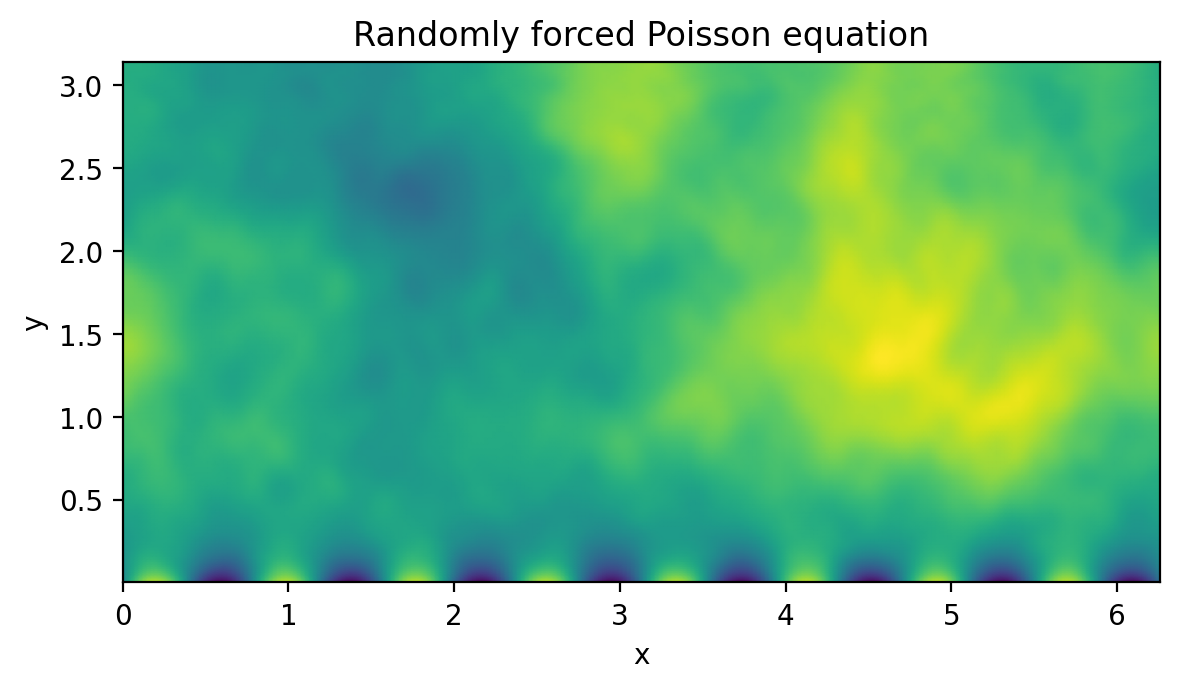

In [5]:
"""
Dedalus script solving the 2D Poisson equation with mixed boundary conditions.
This script demonstrates solving a 2D Cartesian linear boundary value problem
and produces a plot of the solution. It should take just a few seconds to run.

We use a Fourier(x) * Chebyshev(y) discretization to solve the LBVP:
    dx(dx(u)) + dy(dy(u)) = f
    u(y=0) = g
    dy(u)(y=Ly) = h

For a scalar Laplacian on a finite interval, we need two tau terms. Here we
choose to lift them to the natural output (second derivative) basis.

To run and plot:
    $ python3 poisson.py
"""

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)


# Parameters
Lx, Ly = 2*np.pi, np.pi
Nx, Ny = 256, 128
dtype = np.float64

# Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx))
ybasis = d3.Chebyshev(coords['y'], size=Ny, bounds=(0, Ly))

# Fields
u = dist.Field(name='u', bases=(xbasis, ybasis))
tau_1 = dist.Field(name='tau_1', bases=xbasis)
tau_2 = dist.Field(name='tau_2', bases=xbasis)

# Forcing
x, y = dist.local_grids(xbasis, ybasis)
f = dist.Field(bases=(xbasis, ybasis))
g = dist.Field(bases=xbasis)
h = dist.Field(bases=xbasis)
f.fill_random('g', seed=40)
f.low_pass_filter(shape=(64, 32))
g['g'] = np.sin(8*x) * 0.025
h['g'] = 0

# Substitutions
dy = lambda A: d3.Differentiate(A, coords['y'])
lift_basis = ybasis.derivative_basis(2)
lift = lambda A, n: d3.Lift(A, lift_basis, n)

# Problem
problem = d3.LBVP([u, tau_1, tau_2], namespace=locals())
problem.add_equation("lap(u) + lift(tau_1,-1) + lift(tau_2,-2) = f")
problem.add_equation("u(y=0) = g")
problem.add_equation("dy(u)(y=Ly) = h")

# Solver
solver = problem.build_solver()
solver.solve()

# Gather global data
x = xbasis.global_grid(dist, scale=1)
y = ybasis.global_grid(dist, scale=1)
ug = u.allgather_data('g')

# Plot
if dist.comm.rank == 0:
    plt.figure(figsize=(6, 4))
    plt.pcolormesh(x.ravel(), y.ravel(), ug.T, cmap='viridis', shading='gouraud', rasterized=True)
    plt.gca().set_aspect('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Randomly forced Poisson equation")
    plt.tight_layout()
    # plt.savefig('poisson.pdf')
    # plt.savefig('poisson.png', dpi=200)

# Rayleigh-Benard convection

In [6]:
"""
Dedalus script simulating 2D horizontally-periodic Rayleigh-Benard convection.
This script demonstrates solving a 2D Cartesian initial value problem. It can
be ran serially or in parallel, and uses the built-in analysis framework to save
data snapshots to HDF5 files. The `plot_snapshots.py` script can be used to
produce plots from the saved data. It should take about 5 cpu-minutes to run.

The problem is non-dimensionalized using the box height and freefall time, so
the resulting thermal diffusivity and viscosity are related to the Prandtl
and Rayleigh numbers as:

    kappa = (Rayleigh * Prandtl)**(-1/2)
    nu = (Rayleigh / Prandtl)**(-1/2)

For incompressible hydro with two boundaries, we need two tau terms for each the
velocity and buoyancy. Here we choose to use a first-order formulation, putting
one tau term each on auxiliary first-order gradient variables and the others in
the PDE, and lifting them all to the first derivative basis. This formulation puts
a tau term in the divergence constraint, as required for this geometry.

To run and plot using e.g. 4 processes:
    $ mpiexec -n 4 python3 rayleigh_benard.py
    $ mpiexec -n 4 python3 plot_snapshots.py snapshots/*.h5
"""

import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)


# Parameters
Lx, Lz = 4, 1
Nx, Nz = 256, 64
Rayleigh = 2e6
Prandtl = 1
dealias = 3/2
stop_sim_time = 50
timestepper = d3.RK222
max_timestep = 0.125
dtype = np.float64

# Bases
coords = d3.CartesianCoordinates('x', 'z')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
zbasis = d3.ChebyshevT(coords['z'], size=Nz, bounds=(0, Lz), dealias=dealias)

# Fields
p = dist.Field(name='p', bases=(xbasis,zbasis))
b = dist.Field(name='b', bases=(xbasis,zbasis))
u = dist.VectorField(coords, name='u', bases=(xbasis,zbasis))
tau_p = dist.Field(name='tau_p')
tau_b1 = dist.Field(name='tau_b1', bases=xbasis)
tau_b2 = dist.Field(name='tau_b2', bases=xbasis)
tau_u1 = dist.VectorField(coords, name='tau_u1', bases=xbasis)
tau_u2 = dist.VectorField(coords, name='tau_u2', bases=xbasis)

# Substitutions
kappa = (Rayleigh * Prandtl)**(-1/2)
nu = (Rayleigh / Prandtl)**(-1/2)
x, z = dist.local_grids(xbasis, zbasis)
ex, ez = coords.unit_vector_fields(dist)
lift_basis = zbasis.derivative_basis(1)
lift = lambda A: d3.Lift(A, lift_basis, -1)
grad_u = d3.grad(u) + ez*lift(tau_u1) # First-order reduction
grad_b = d3.grad(b) + ez*lift(tau_b1) # First-order reduction

# Problem
# First-order form: "div(f)" becomes "trace(grad_f)"
# First-order form: "lap(f)" becomes "div(grad_f)"
problem = d3.IVP([p, b, u, tau_p, tau_b1, tau_b2, tau_u1, tau_u2], namespace=locals())
problem.add_equation("trace(grad_u) + tau_p = 0")
problem.add_equation("dt(b) - kappa*div(grad_b) + lift(tau_b2) = - u@grad(b)")
problem.add_equation("dt(u) - nu*div(grad_u) + grad(p) - b*ez + lift(tau_u2) = - u@grad(u)")
problem.add_equation("b(z=0) = Lz")
problem.add_equation("u(z=0) = 0")
problem.add_equation("b(z=Lz) = 0")
problem.add_equation("u(z=Lz) = 0")
problem.add_equation("integ(p) = 0") # Pressure gauge

# Solver
solver = problem.build_solver(timestepper)
solver.stop_sim_time = stop_sim_time

# Initial conditions
b.fill_random('g', seed=42, distribution='normal', scale=1e-3) # Random noise
b['g'] *= z * (Lz - z) # Damp noise at walls
b['g'] += Lz - z # Add linear background

# Analysis
snapshots = solver.evaluator.add_file_handler('snapshots', sim_dt=0.25, max_writes=50)
snapshots.add_task(b, name='buoyancy')
snapshots.add_task(-d3.div(d3.skew(u)), name='vorticity')

# CFL
CFL = d3.CFL(solver, initial_dt=max_timestep, cadence=10, safety=0.5, threshold=0.05,
             max_change=1.5, min_change=0.5, max_dt=max_timestep)
CFL.add_velocity(u)

# Flow properties
flow = d3.GlobalFlowProperty(solver, cadence=10)
flow.add_property(np.sqrt(u@u)/nu, name='Re')

# Main loop
startup_iter = 10
try:
    logger.info('Starting main loop')
    while solver.proceed:
        timestep = CFL.compute_timestep()
        solver.step(timestep)
        if (solver.iteration-1) % 500 == 0:
            max_Re = flow.max('Re')
            logger.info('Iteration=%i, Time=%e, dt=%e, max(Re)=%f' %(solver.iteration, solver.sim_time, timestep, max_Re))
except:
    logger.error('Exception raised, triggering end of main loop.')
    raise
finally:
    solver.log_stats()



2025-04-16 18:05:45,751 subsystems 0/1 INFO :: Building subproblem matrices 1/128 (~1%) Elapsed: 0s, Remaining: 41s, Rate: 3.1e+00/s
2025-04-16 18:05:46,804 subsystems 0/1 INFO :: Building subproblem matrices 13/128 (~10%) Elapsed: 1s, Remaining: 12s, Rate: 9.4e+00/s
2025-04-16 18:05:47,839 subsystems 0/1 INFO :: Building subproblem matrices 26/128 (~20%) Elapsed: 2s, Remaining: 9s, Rate: 1.1e+01/s
2025-04-16 18:05:49,224 subsystems 0/1 INFO :: Building subproblem matrices 39/128 (~30%) Elapsed: 4s, Remaining: 9s, Rate: 1.0e+01/s
2025-04-16 18:05:50,389 subsystems 0/1 INFO :: Building subproblem matrices 52/128 (~41%) Elapsed: 5s, Remaining: 7s, Rate: 1.0e+01/s
2025-04-16 18:05:51,675 subsystems 0/1 INFO :: Building subproblem matrices 65/128 (~51%) Elapsed: 6s, Remaining: 6s, Rate: 1.0e+01/s
2025-04-16 18:05:52,429 subsystems 0/1 INFO :: Building subproblem matrices 78/128 (~61%) Elapsed: 7s, Remaining: 4s, Rate: 1.1e+01/s
2025-04-16 18:05:53,228 subsystems 0/1 INFO :: Building subpro

2025-04-16 18:11:36,086 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+01/s


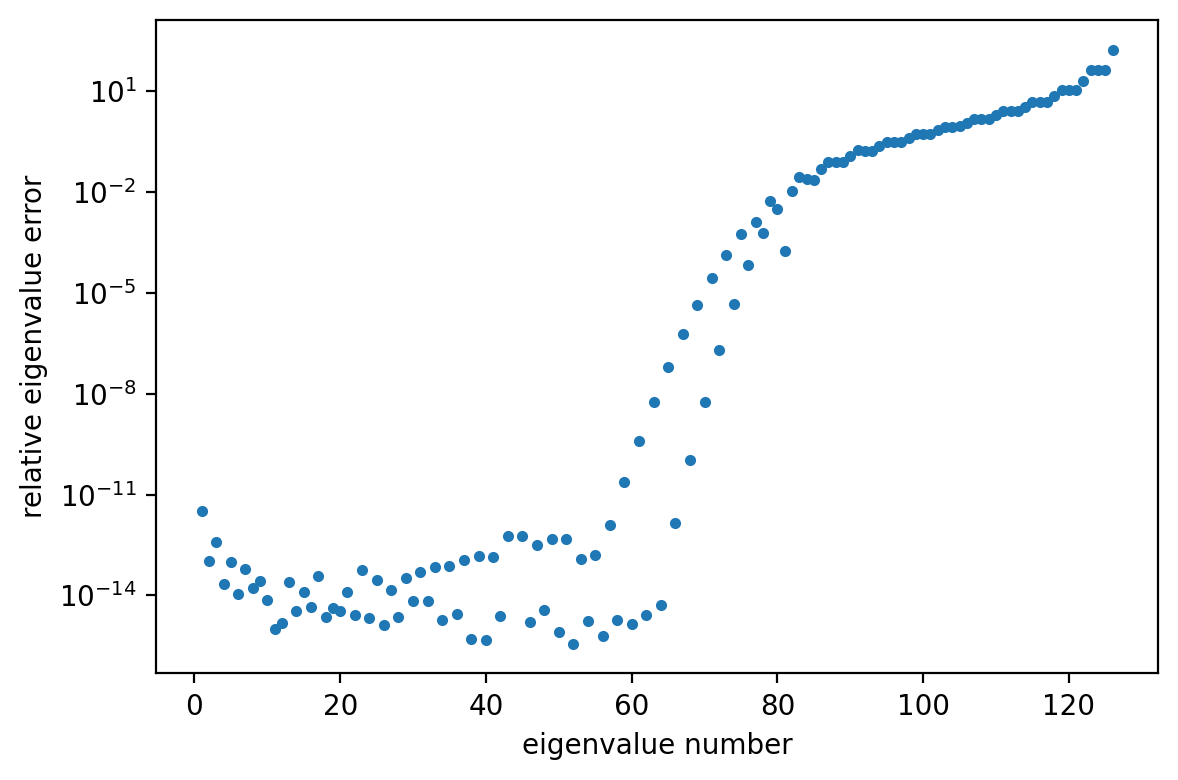

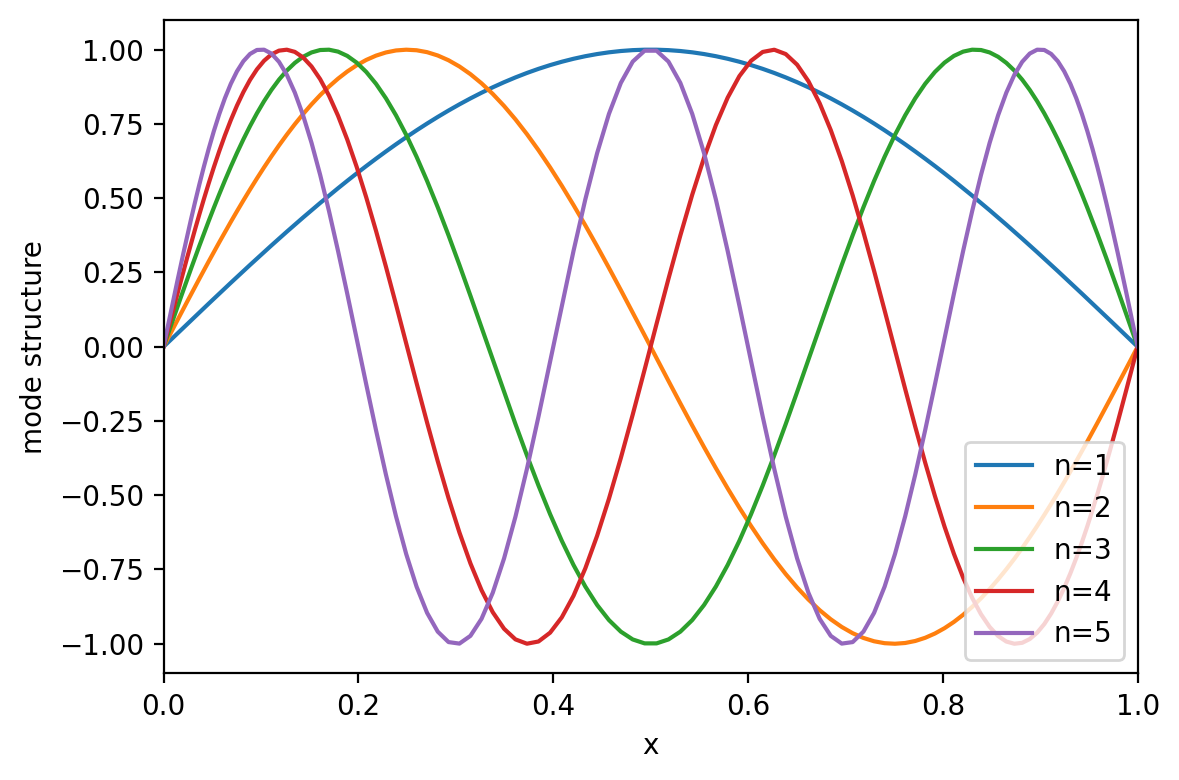

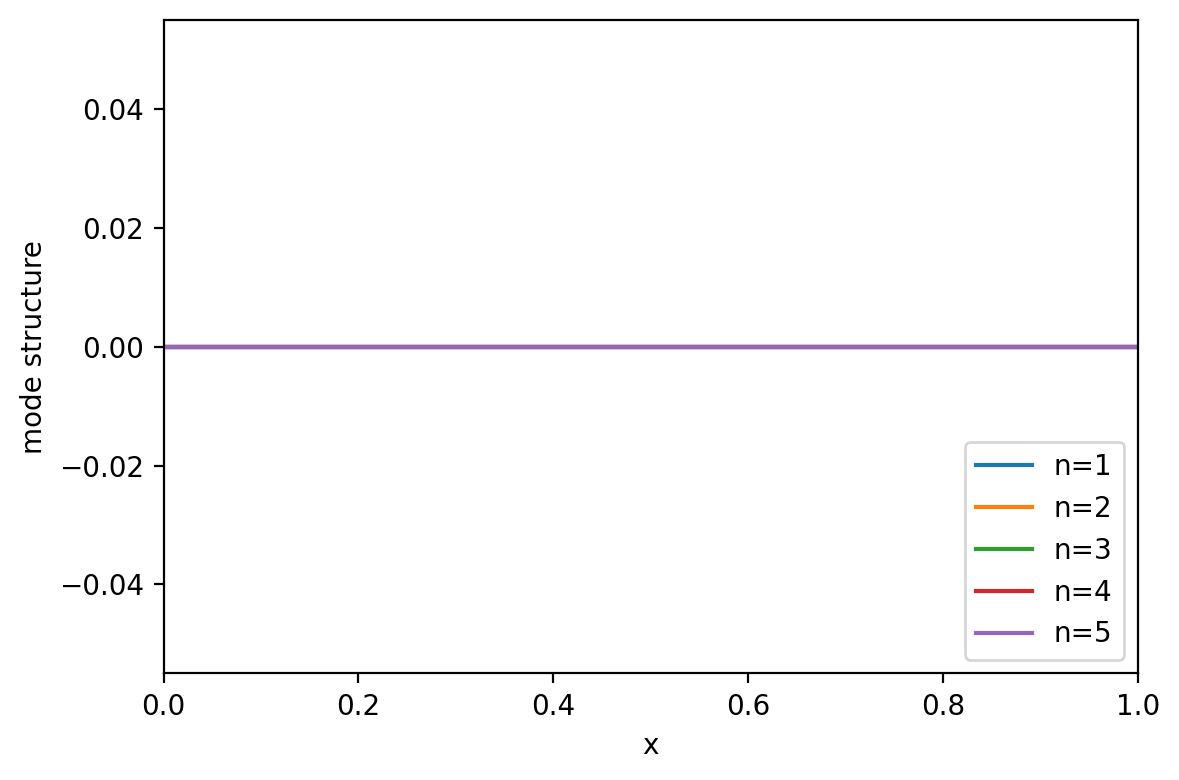

In [7]:
"""
Dedalus script computing the eigenmodes of waves on a clamped string.
This script demonstrates solving a 1D eigenvalue problem and produces
plots of the first few eigenmodes and the relative error of the eigenvalues.
It should take just a few seconds to run (serial only).

We use a Legendre basis to solve the EVP:
w^2 = s
u=v_10y
    s*u + dx(dx(u)) = 0
    u(x=0) = 0
    u(x=Lx) = 0
where s is the eigenvalue.

For the second derivative on a closed interval, we need two tau terms.
Here we choose to use a first-order formulation, putting one tau term
on an auxiliary first-order variable and another in the PDE, and lifting
both to the first derivative basis.

To run and plot:
    $ python3 waves_on_a_string.py
"""

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)


# Parameters
Lx = 1
Nx = 128
dtype = np.complex128

# Bases
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=dtype)
xbasis = d3.Legendre(xcoord, size=Nx, bounds=(0, Lx))

# Fields
u = dist.Field(name='u', bases=xbasis)
tau_1 = dist.Field(name='tau_1')
tau_2 = dist.Field(name='tau_2')
s = dist.Field(name='s')
# s sempre positiva i real
c=3
#np.piecewise(s['g'], [s['g'] < 0, s['g'] >= 0], [0, 1])

# Substitutions
dx = lambda A: d3.Differentiate(A, xcoord)
lift_basis = xbasis.derivative_basis(1)
lift = lambda A: d3.Lift(A, lift_basis, -1)
ux = dx(u) + lift(tau_1) # First-order reduction
uxx = dx(ux) + lift(tau_2)

# Problem
problem = d3.EVP([u, tau_1, tau_2], eigenvalue=s, namespace=locals())
problem.add_equation("s*u + c*uxx = 0")
problem.add_equation("u(x=0) = 0")
problem.add_equation("u(x=Lx) = 0")

# Solve
solver = problem.build_solver()
solver.solve_dense(solver.subproblems[0])
evals = np.sort(solver.eigenvalues)
n = 1 + np.arange(evals.size)
true_evals = c*(n * np.pi / Lx)**2
relative_error = np.abs(evals - true_evals) / true_evals

# Plot
plt.figure(figsize=(6, 4))
plt.semilogy(n, relative_error, '.')
plt.xlabel("eigenvalue number")
plt.ylabel("relative eigenvalue error")
plt.tight_layout()
plt.savefig("eigenvalue_error.pdf")
plt.savefig("eigenvalue_error.png", dpi=200)

plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis)
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:5], start=1):
    solver.set_state(idx, solver.subsystems[0])
    ug = (u['g'] / u['g'][1]).real
    # ens interessa part Im per comnprovar que està bé
    
    plt.plot(x, ug/np.max(np.abs(ug)), label=f"n={n}")
plt.xlim(0, 1)
plt.legend(loc="lower right")
plt.ylabel(r"mode structure")
plt.xlabel(r"x")
plt.tight_layout()
plt.savefig("eigenvectors.pdf")
plt.savefig("eigenvectors.png", dpi=200)

plt.figure(figsize=(6, 4))
x = dist.local_grid(xbasis)
for n, idx in enumerate(np.argsort(solver.eigenvalues)[:5], start=1):
    solver.set_state(idx, solver.subsystems[0])
    
    # ens interessa part Im per comnprovar que està bé
    ui = (u['g'] / u['g'][1]).imag
    
    plt.plot(x, ui, label=f"n={n}") # no normalitzam pq ens divideix per 0
plt.xlim(0, 1)
plt.legend(loc="lower right")
plt.ylabel(r"mode structure")
plt.xlabel(r"x")
plt.tight_layout()
plt.savefig("eigenvectors.pdf")
plt.savefig("eigenvectors.png", dpi=200)

# KdV-Burgers equation (1D IVP)
Initial Value Problem

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
coords = d3.CartesianCoordinates('x', 'y', 'z')

In [11]:
dist = d3.Distributor(coords, dtype=np.float64) # No mesh for serial / automatic parallelization
# Pel distributor primer es determina la base de la PDE, s'especifica el tipus de dades dels camps emprats i es pot especificar (o no) la malla
# en la que es treballarà.

In [12]:
for layout in dist.layouts:
    print('Layout {}:  Grid space: {}  Local: {}'.format(layout.index, layout.grid_space, layout.local))

# Es passa la base de la PDE a l'espai de coordenades per obtenir la malla global (crec)


Layout 0:  Grid space: [False False False]  Local: [ True  True  True]
Layout 1:  Grid space: [False False  True]  Local: [ True  True  True]
Layout 2:  Grid space: [False  True  True]  Local: [ True  True  True]
Layout 3:  Grid space: [ True  True  True]  Local: [ True  True  True]


In [13]:
xbasis = d3.RealFourier(coords['x'], size=32, bounds=(0,1), dealias=3/2)
ybasis = d3.RealFourier(coords['y'], size=32, bounds=(0,1), dealias=3/2)
zbasis = d3.Chebyshev(coords['z'], size=32, bounds=(0,1), dealias=3/2)

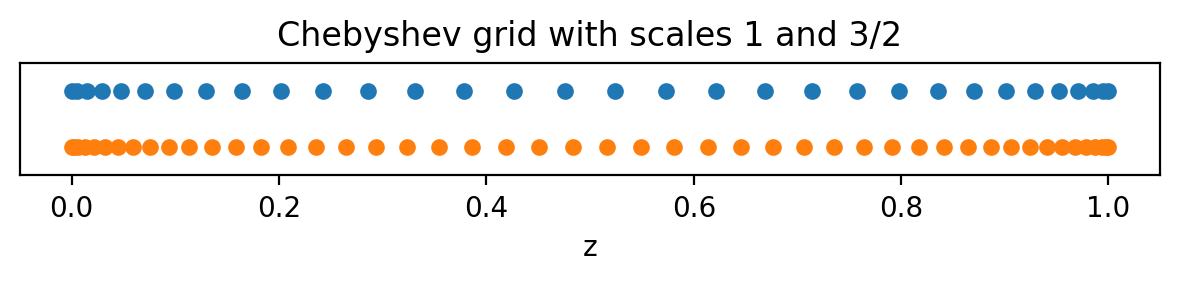

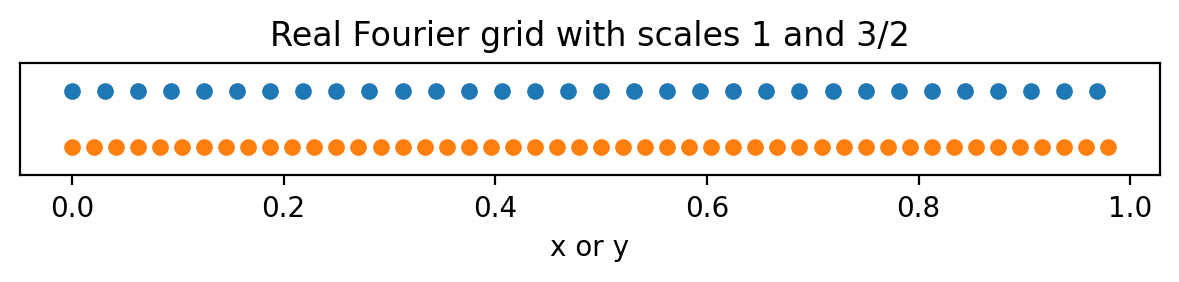

In [14]:
grid_normal = zbasis.global_grid(dist, scale=1).ravel()
grid_dealias = zbasis.global_grid(dist, scale=3/2).ravel()

plt.figure(figsize=(6, 1.5), dpi=100)
plt.plot(grid_normal, 0*grid_normal+1, 'o', markersize=5)
plt.plot(grid_dealias, 0*grid_dealias-1, 'o', markersize=5)
plt.xlabel('z')
plt.title('Chebyshev grid with scales 1 and 3/2')
plt.ylim([-2, 2])
plt.gca().yaxis.set_ticks([]);
plt.tight_layout()
plt.show()

# Com que el # de nodes creix quadràticament cap els extrems és útil fer servir la base de Chebyshev pels
# problemes amb condicions de contorn fixades als extrems. D'aquesta manera es redueix l'error numèric.

grid_normal = xbasis.global_grid(dist, scale=1).ravel()
grid_dealias = xbasis.global_grid(dist, scale=3/2).ravel()

plt.figure(figsize=(6, 1.5), dpi=100)
plt.plot(grid_normal, 0*grid_normal+1, 'o', markersize=5)
plt.plot(grid_dealias, 0*grid_dealias-1, 'o', markersize=5)
plt.xlabel('x or y')
plt.title('Real Fourier grid with scales 1 and 3/2')
plt.ylim([-2, 2])
plt.gca().yaxis.set_ticks([]);
plt.tight_layout()
plt.show()

# The dealias = 3/2 argument applies a dealiasing factor, which is a common technique to reduce numerical
# errors in spectral methods by padding the grid with additional points during computations.


In [15]:
local_x = dist.local_grid(xbasis)
local_y = dist.local_grid(ybasis)
local_z = dist.local_grid(zbasis)
print('Local x shape:', local_x.shape)
print('Local y shape:', local_y.shape)
print('Local z shape:', local_z.shape)

Local x shape: (32, 1, 1)
Local y shape: (1, 32, 1)
Local z shape: (1, 1, 32)


In [16]:
local_kx = dist.local_modes(xbasis)
local_ky = dist.local_modes(ybasis)
local_nz = dist.local_modes(zbasis)
print('Local kx shape:', local_kx.shape)
print('Local ky shape:', local_ky.shape)
print('Local nz shape:', local_nz.shape)

Local kx shape: (32, 1, 1)
Local ky shape: (1, 32, 1)
Local nz shape: (1, 1, 32)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

In [18]:
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=np.float64)

xbasis = d3.RealFourier(coords['x'], 64, bounds=(-np.pi, np.pi), dealias=3/2)
ybasis = d3.Chebyshev(coords['y'], 64, bounds=(-1, 1), dealias=3/2)

f = dist.Field(name='f', bases=(xbasis, ybasis))
# f és un camp de dades amb dues bases, si volem un camp constant no posam res i si volem que  depengui d'una base només en posam una

In [19]:
# remember the bases of a field describe its spatial variation, while the vector/tensor bundle describes the components of the field
# for instance, we could have a 2D vector with x and y components that only varies in the x dimension, and hence only has an x basis
# let’s build such a vector field on our domain:
u = dist.VectorField(coords, name='u', bases=xbasis)


In [20]:
# we can see that fields are instantiated in coefficient space:
f.layout.grid_space
# com que no es troba en la malla, el camp es troba en l'espai de coeficients

array([False, False])

<IPython.core.display.Math object>

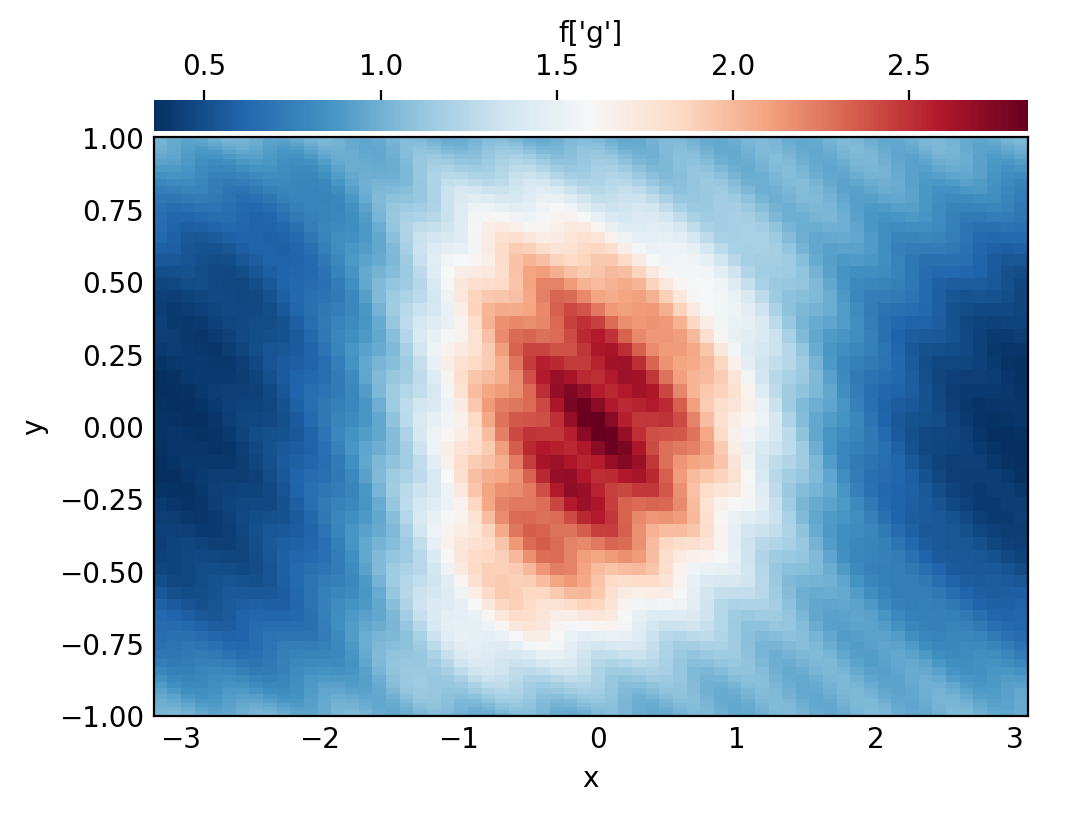

In [21]:
from IPython.display import display, Math

# 'g' representa el "grid data" que és la representació del camp en els nodes de la malla (espai físic, "real")
# i 'c' representa el "coefficient data" que és la representació del camp en els coeficients de la base (espai de Fourier p.ex.)

x = dist.local_grid(xbasis)
y = dist.local_grid(ybasis)
f['g'] = np.exp((1-y**2)*np.cos(x+np.cos(x)*y**2)) * (1 + 0.05*np.cos(10*(x+2*y))) # t'has lluit Dedalus cercant una fórmula per representar es camp eh...

# Display the equation in LaTeX
display(Math(r"f(x, y) = \exp\left((1 - y^2) \cdot \cos\left(x + \cos(x) \cdot y^2\right)\right) \cdot \left(1 + 0.05 \cdot \cos\left(10 \cdot (x + 2 \cdot y)\right)\right)"))


# Plot grid values
plot_bot_2d(f, figkw=figkw, title="f['g']");

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_14954/2323054644.py:4: RuntimeWarning: divide by zero encountered in log10
  log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))


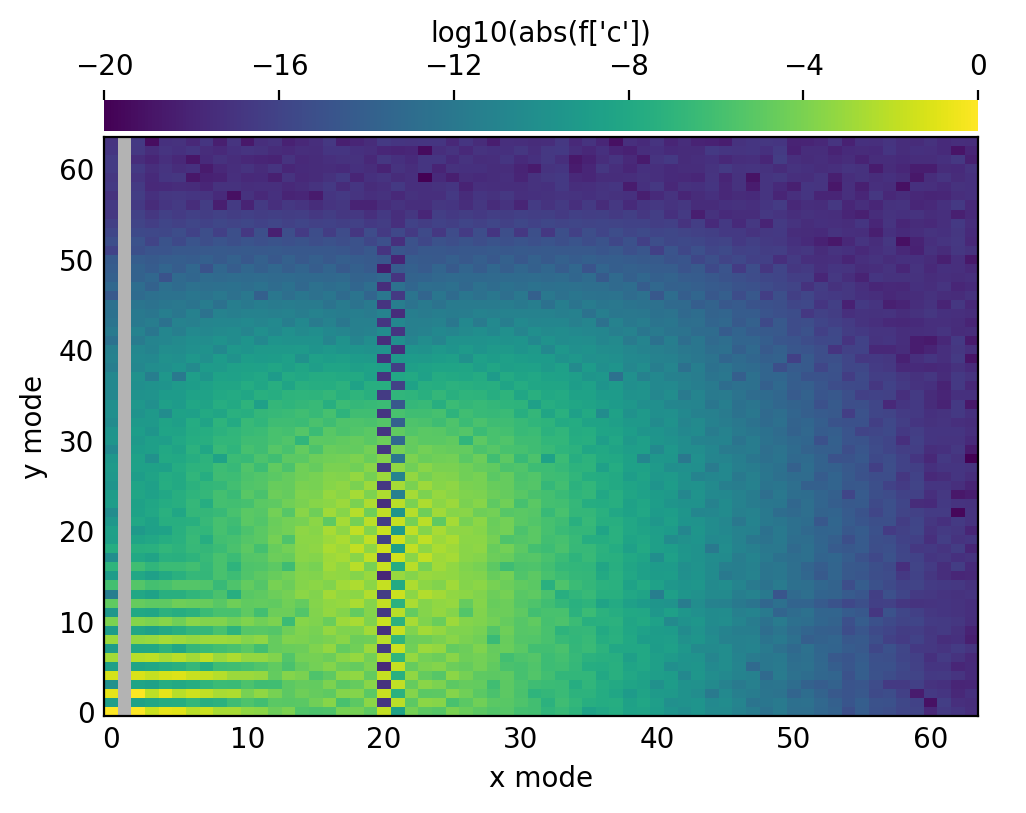

In [22]:
f['c']

# Plot log magnitude of spectral coefficients
log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))
plot_bot_2d(f, func=log_mag, clim=(-20, 0), cmap='viridis', title="log10(abs(f['c'])", figkw=figkw);

# Examining the spectral coefficients of fields is very useful, since the amplitude of the highest modes indicate the truncation errors in the spectral discretizations of fields.
# If these modes are small, like here, then we know the field is well-resolved.

In [23]:
u['g'].shape # és un camp vectorial

# The first axis is size 2, corresponding to the two vector components (x and y). The remaining physical shape is (64,1), since this field is constant along the 
# y direction (it was only defined with an x basis). D'on surt però el 64 i l'1?

# it’s typically recommended to initialize vector and tensor data in grid space
# i després passar-ho a coeficients, fer els càlculs i tornar-ho a passar a l'espai físic...

(2, 64, 1)

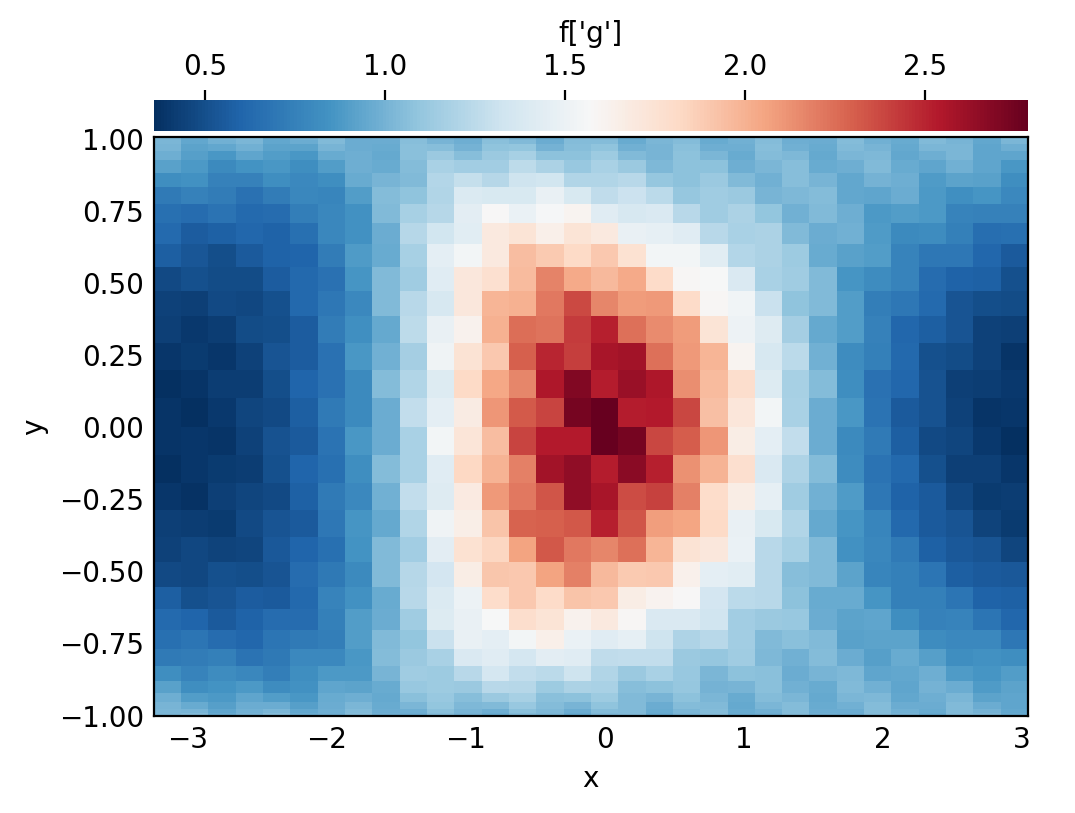

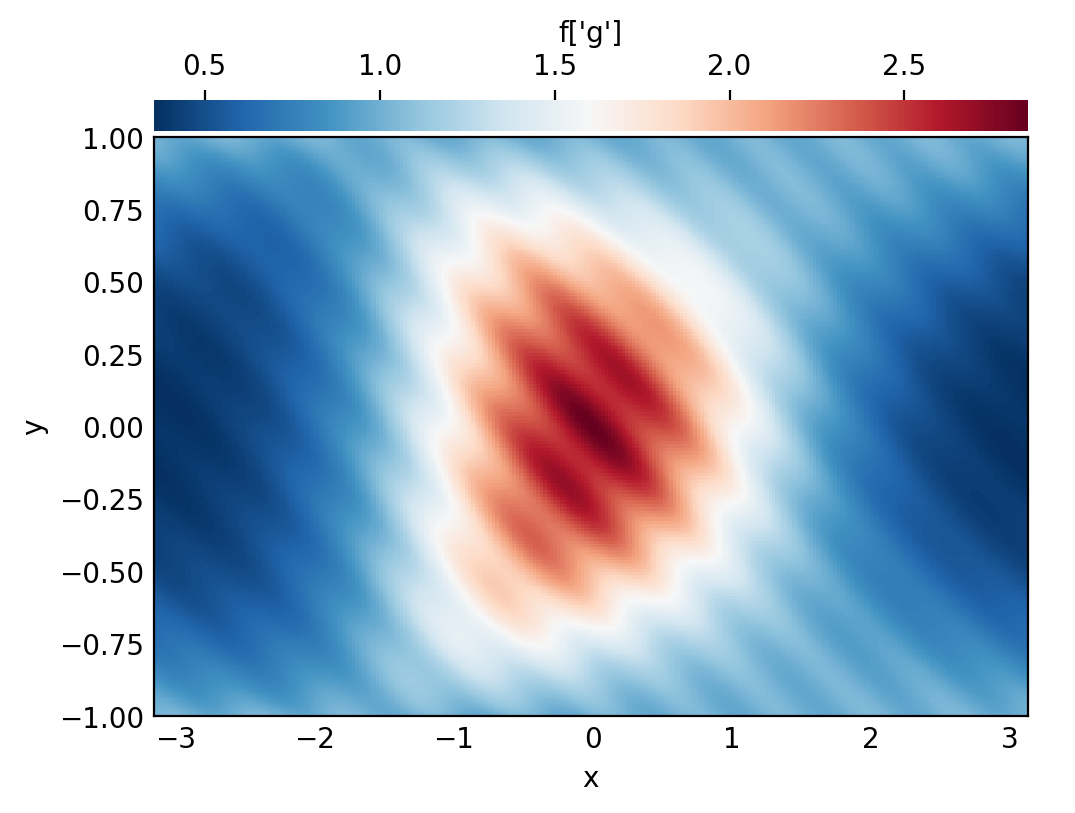

In [24]:
# Es pot incrementar la resolució del camp amb el change_scales:

f.change_scales(0.5)

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

# Si el factor és menor que 1 es perd informació. Es pot tornar a recuperar???

f.change_scales(4)

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

f.change_scales(1)

# Es pot tornar a recuperar la informació; només es perd en el plot.

In [25]:
g_op = 1 - 2*f
print(g_op)
# No ens torna un camp, torna un operador

C(C(1)) + -1*2*f


<IPython.core.display.Math object>

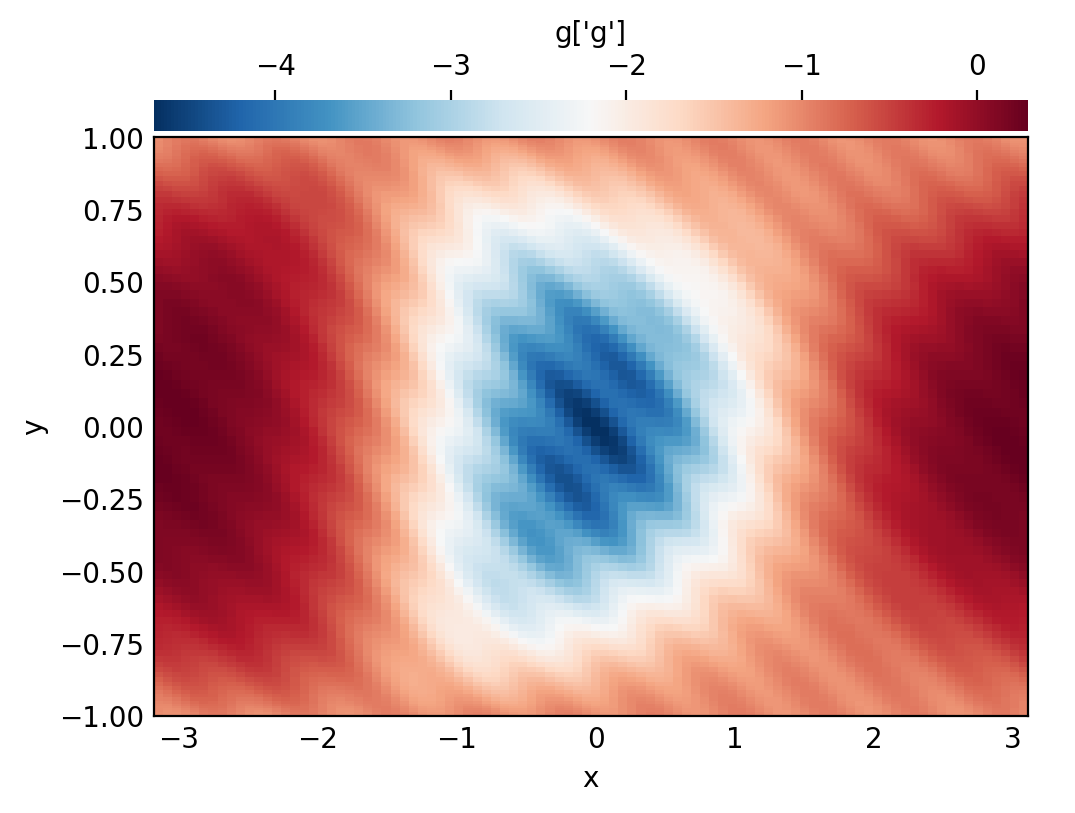

In [26]:
# Per això hem de fer un .evaluate per obtenir el camp resultant

g = g_op.evaluate()

# Plot grid values
g['g']
plot_bot_2d(g, title="g['g']", figkw=figkw);

# The dealias scale factors set during basis instantiation are used for the evaluation of all operators.
# This is important to remember when using operators in a simulation, as the dealiasing factors will be applied to all operators by default.

display(Math(r"g(x, y) = 1 - 2 \cdot f(x, y)"))


In [27]:
# Es poden combinar els operadors:
h_op = 1 / np.cosh(g_op + 2.5)
print(h_op)

Pow(cosh(C(C(1)) + -1*2*f + C(C(2.5))), -1)


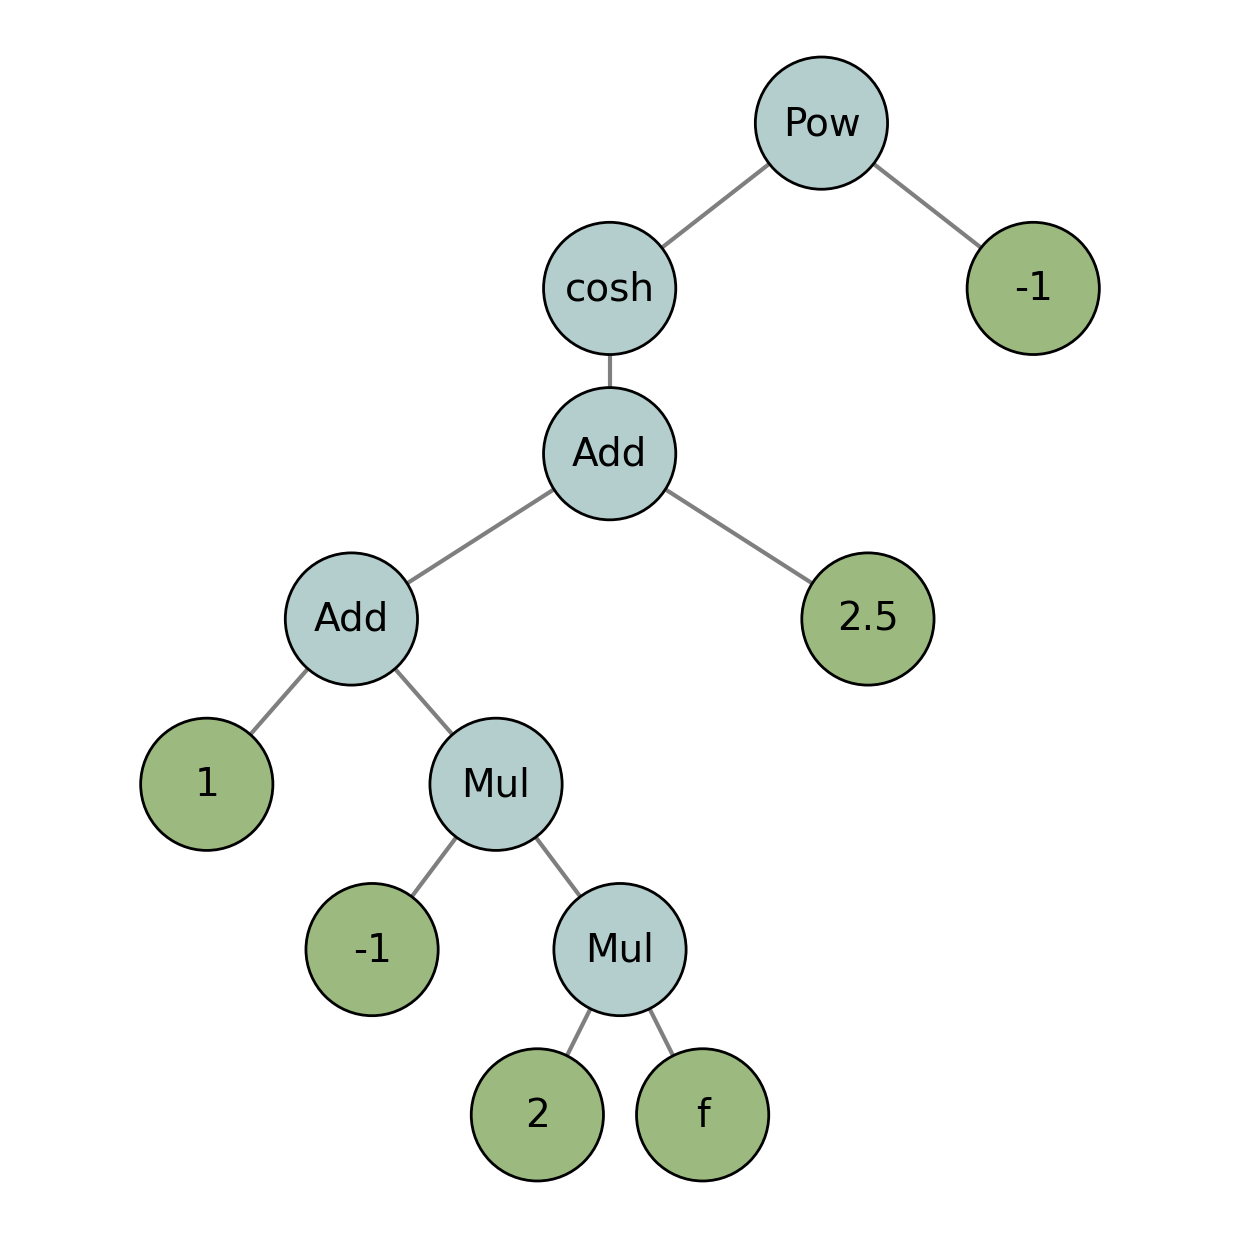

In [28]:
# Perque sigui més visual agafam l'eina del dedalus.tools oper representar un grafo de l'operador:
from dedalus.tools.plot_op import plot_operator
plot_operator(h_op, figsize=6, fontsize=14, opsize=0.4)

# Primer representa les operacions de l'operador h_op
# power of the cosh() = -1
# 2.5 + g_op

# i després fa les operacions al camp g_op:
# 1 + g_op
# g_op = -1 * 2*f


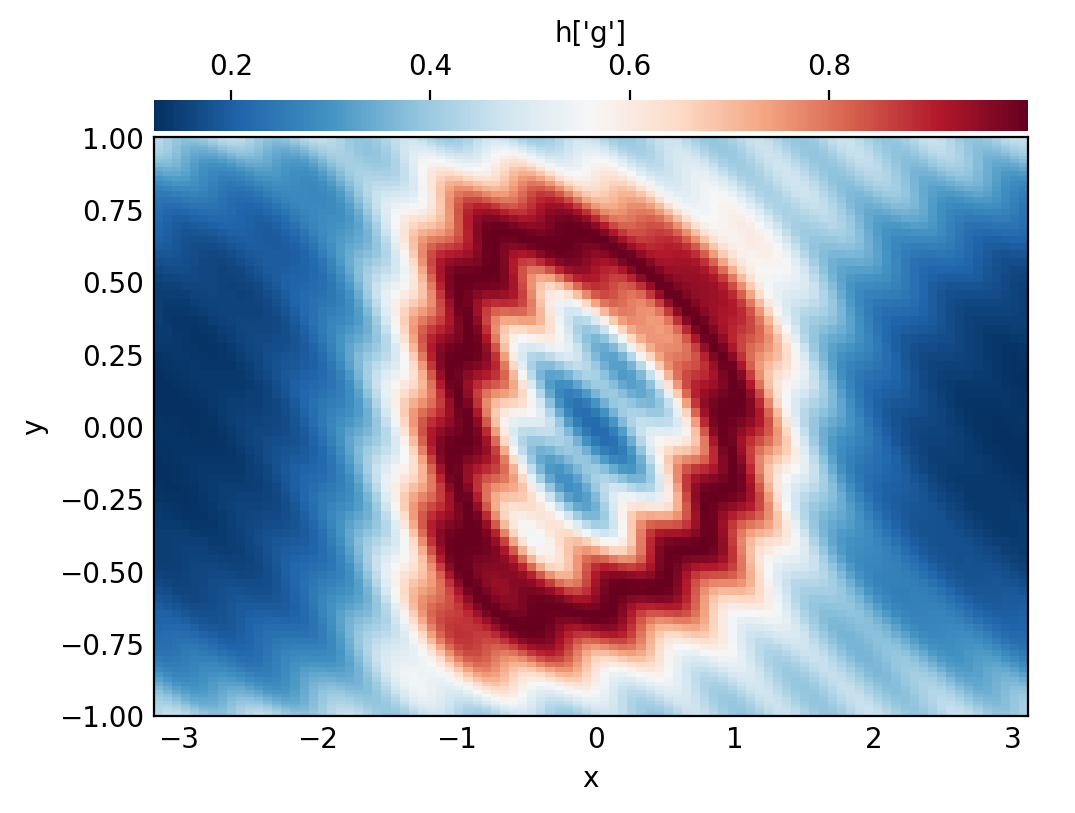

In [29]:
# I tornam representar el camp en l'espai físic (grid space, 'g'):
h = h_op.evaluate()

#h.change_scales(20) # perque es vegui més nítid...

# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);
# es representa el camp de nou per l'evaluate

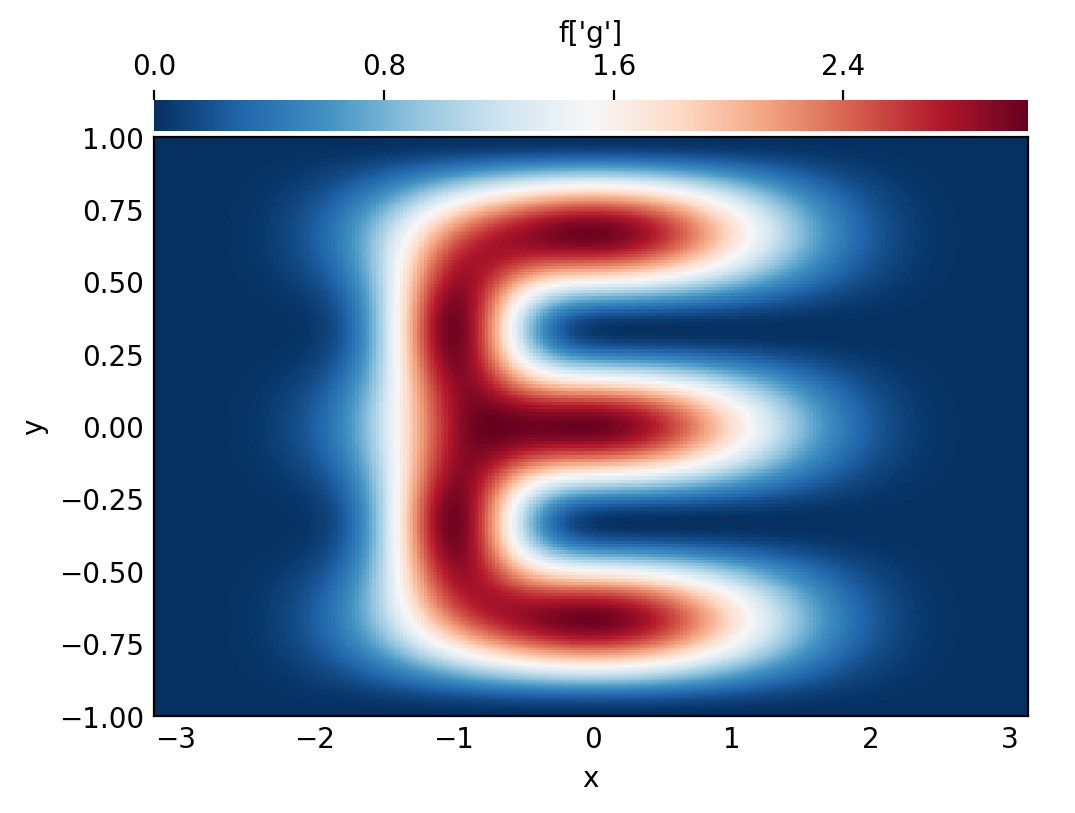

In [30]:
# A key point is that the operator objects symbolically represent an operation on the field arguments, and are evaluated using deferred evaluation.
# If we change the data of the field arguments and re-evaluate an operator, we get a new result.

# Change scales back to 1 to build new grid data, if not it breaks!!!
f.change_scales(1)
f['g'] = 3*np.cos(1.5*np.pi*y)**2 * np.cos(x/2)**4 + 3*np.exp(-((2*x+2)**2 + (4*y+4/3)**2)) + 3*np.exp(-((2*x+2)**2 + (4*y-4/3)**2)) # canviam el camp...

# Si vols tornar a donar nitidesa al teu camp li has de tornar a canviar s'escala CADA VEGADA QUE ES REDEFINEIX, sinó s'espenya!!!
f.change_scales(4)
# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

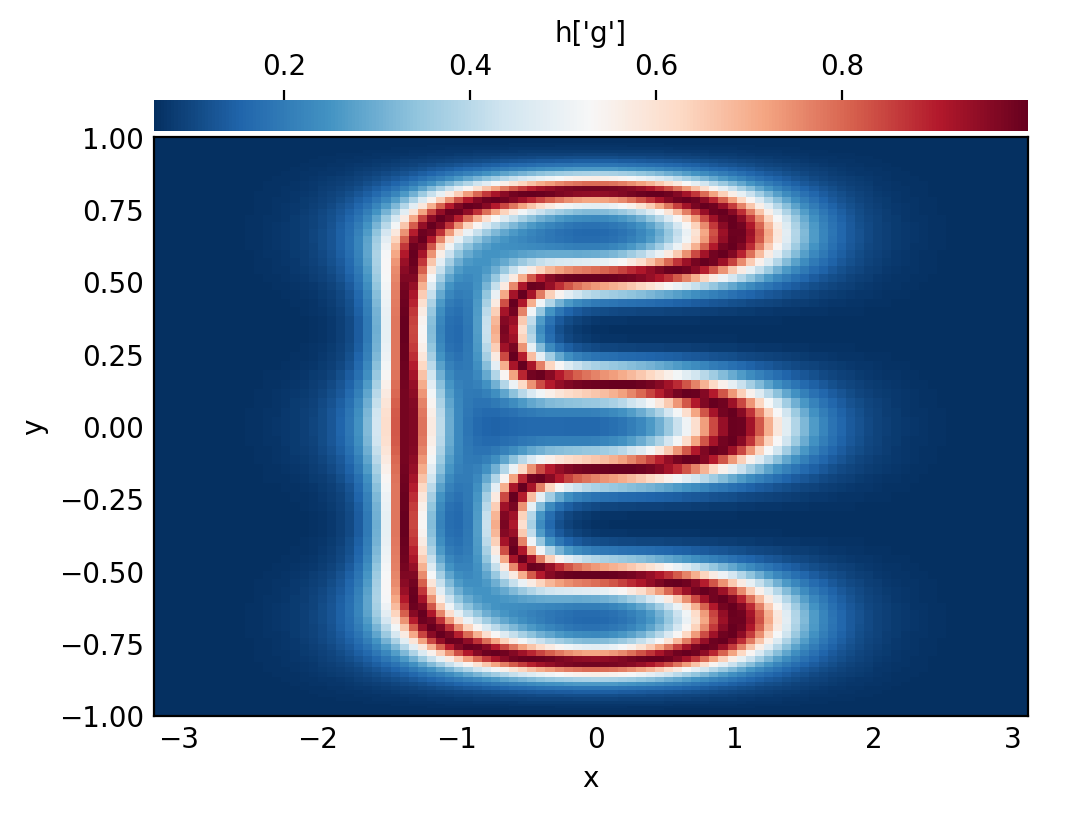

In [31]:
# Al nou camp se li pot aplicar la mateixa operació que hem definit abans:

h = h_op.evaluate()

# Si no es canvia l'escala de nou, no manté l'escala d'adalt
# h.change_scales(4)

# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);

In [32]:
# Per diferenciar un camp s'ha d'especificar la dimensió en que es fa la derivada:
fx = d3.Differentiate(f, coords['x'])

# Per més dimensions també existeixen els operadors de gradient, divergència, producte vectorial i laplaciana (divergència del gradient)

In [33]:
# A coordinate system can optionally be specified as the tangent bundle for the gradient and Laplacian (defaulting to the distributor’s coordinate system), and a tensor index
# can optionally be specified for the divergence (defaulting to 0). The gradient of a rank  tensor field will be rank , etc.

lap_f = d3.Laplacian(f).evaluate()
grad_f = d3.Gradient(f).evaluate()
print('f shape:', f['g'].shape)
print('Grad(f) shape:', grad_f['g'].shape)
print('Lap(f) shape:', lap_f['g'].shape)

div_grad_f = d3.Divergence(d3.Gradient(f)).evaluate()
print('Lap(f) is Div(Grad(f)):', np.allclose(lap_f['g'], div_grad_f['g']))

f shape: (96, 96)
Grad(f) shape: (2, 96, 96)
Lap(f) shape: (96, 96)
Lap(f) is Div(Grad(f)): True


In [34]:
# Per operar camps tensorials hi ha operadors específics, per exemple:
# Trace for contracting two specified indices (defaulting to 0 and 1).
# TransposeComponents for swapping two specified indices (defaulting to 0 and 1).
# Skew for taking a 90-degree positive rotation of 2D vector fields.
# Symmetric for taking the symmetric part of a 2D vector field.
# Antisymmetric for taking the antisymmetric part of a 2D vector field.

grad_u = d3.Gradient(u)
transpose_grad_u = d3.TransposeComponents(grad_u)

In [35]:
# També es pot integrar i fer promitjos (ò promigs, també es pot dir així) de camps:

# Total integral of the field
f_int = d3.Integrate(f, ('x', 'y'))
print('f integral:', f_int.evaluate()['g'])

# Average of the field
f_ave = d3.Average(f, ('x', 'y'))
print('f average:', f_ave.evaluate()['g'])

f integral: [[9.42458659]]
f average: [[0.74998477]]


In [36]:
# Interpolation along a coordinate is computed with the Interpolate operator, or using the __call__ method on fields/operators, with keywords specifying the coordinate
# and position. The strings 'left', 'right', and 'center' can be used to refer to the endpoints and middle of 1D intervals, respectively, for convenience.

f00 = f(x=0, y=0)
print('f(0,0):', f00.evaluate()['g'])

f(0,0): [[3.01857352]]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
# The left-hand side (LHS) of the equations must be first-order in temporal derivatives and linear in the problem variables.
# The right-hand side (RHS) of the equations may contain nonlinear and time-dependent terms, but no temporal derivatives.

# IVP - Initial Value Problems
# EVP - Eigenvalue Problems
# LBVP - Linear Boundary Value Problems
# NLBVP - Nonlinear Boundary Value Problems

In [40]:
# Let’s start setting up the Complex Ginzburg-Landau Equation (CGLE) for a variable u(x,t) on a finite interval x ϵ [0, 300]
# with homogeneous Dirichlet boundary conditions: u(x=0)=u(x=300)=0.
# The CGLE is a nonlinear PDE that describes the evolution of a complex field u(x,t) in space and time.

# We’ll discretize  with a Chebyshev basis and pick a dealiasing factor of 2 to correctly dealias the cubic nonlinearity.
# This version of Dedalus currently requires explicilty adding tau terms as unknowns to the problem in order to enforce boundary conditions.
# This problem requires two constant tau terms to enforce the two endpoint boundary conditions.

# Bases
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=np.complex128)
xbasis = d3.Chebyshev(xcoord, 1024, bounds=(0, 300), dealias=2)

# Fields
u = dist.Field(name='u', bases=xbasis)
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')

# Problem
problem = d3.IVP([u, tau1, tau2], namespace=locals())

In [41]:
# A little more about substitutions, or using non-variable objects inside the problem.
# These can include other fields that define e.g. the forcing or non-constant coefficients (NCCs) of the PDE.
# NCCs appearing on the LHS will couple the dimensions that they have bases for, so it’s important to only use bases for the non-constant
# dimensions when creating an NCC field

# We don’t have NCCs or periodic dimensions here, but we’ll sketch the process here anyways.
# Consider a 3D problem on a Fourier (x), SinCos (y), and Chebyshev (z) domain.
# Here’s how we would add a simple non-constant coefficient in z to a problem:

#ncc = dist.Field(bases=zbasis)
#ncc['g'] = z**2

# Se defineix un camp real en la base de z, i es pot fer servir en el problema com un coeficient no constant

In [42]:
# Substitutions
dx = lambda A: d3.Differentiate(A, xcoord)
magsq_u = u * np.conj(u) # magnitud al quadrat de u ja que np.conj(u) és el conjugat complex de u
b = 0.5
c = -1.76

# Tau polynomials
tau_basis = xbasis.derivative_basis(2) 
# es genera una base per representar derivades de 2n ordre 
# (normalment empram taus per ordres superiors i per imposar cc)

# Definim els camps de les taus:
p1 = dist.Field(bases=tau_basis)
p2 = dist.Field(bases=tau_basis)
p1['c'][-1] = 1
p2['c'][-2] = 2
# el ['c'] accedeix als coeficients dela base espectral i els índexs [-1] i [-2] es refereixen al darrer i
# al penúltim coeficients. Així s'imposen les condicions de contorn explícitament.

In [43]:
# Equations can then be entered as pairs of operator expressions like (LHS, RHS) or as strings like "LHS = RHS"
# Add main equation, with linear terms on the LHS and nonlinear terms on the RHS
problem.add_equation("dt(u) - u - (1 + 1j*b)*dx(dx(u)) + tau1*p1 + tau2*p2 = - (1 + 1j*c) * magsq_u * u") # 1j = i
# s'afegeixen els camps de tau (tau1 i tau2) a l'equació, i es defineixen les condicions de contorn amb els p1 i p2


# Add boundary conditions
problem.add_equation("u(x='left') = 0")
problem.add_equation("u(x='right') = 0")

{'eqn': interp(<Field 5039056816>, x=right),
 'LHS': interp(<Field 5039056816>, x=right),
 'RHS': 0,
 'condition': 'True',
 'tensorsig': (),
 'dtype': numpy.complex128,
 'valid_modes': array([ True]),
 'M': 0,
 'L': interp(<Field 5039056816>, x=right),
 'F': <Field 5039509760>,
 'domain': <dedalus.core.domain.Domain at 0x12c568b60>,
 'matrix_dependence': array([ True]),
 'matrix_coupling': array([ True])}

In [44]:
# Each problem type (IVP, EVP, LBVP, and NLBVP) has a corresponding solver class that actually performs the solution steps for a corresponding problem.
# Solvers are simply built using the problem.build_solver method

timestepper = d3.RK222
# Build solver
solver = problem.build_solver(timestepper) # Runge-Kutta 2nd order method - timestepper selected manually for each IVP problem

2025-04-16 18:11:49,678 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+01/s


In [45]:
# Stopping criteria
solver.stop_sim_time = 500

In [46]:
# For IVPs and nonlinear BVPs, the initial conditions are set by directly modifying the state variable data before running a simulation.
# Setup a sine wave
x = dist.local_grid(xbasis)
u['g'] = 1e-3 * np.sin(5 * np.pi * x / 300)

In [47]:
# IVPs are iterated using the solver.step method with a provided timestep.
# EVPs are solved using the solver.solve_dense or solver.solve_sparse methods.
# LBVPs are solved using the solver.solve method.
# NLBVPs are iterated using the solver.newton_iteration method

In [48]:
# Setup storage
u.change_scales(1)
u_list = [np.copy(u['g'])]
t_list = [solver.sim_time]

# Main loop
timestep = 0.05
while solver.proceed:
    solver.step(timestep)
    if solver.iteration % 10 == 0:
        u.change_scales(1)
        u_list.append(np.copy(u['g']))
        t_list.append(solver.sim_time)
    if solver.iteration % 1000 == 0:
        print('Completed iteration {}'.format(solver.iteration))

# El solver.proceed passa de True a False quan s'acompleix el criteri d'aturar

# Convert storage lists to arrays
u_array = np.array(u_list)
t_array = np.array(t_list)

# Crec que ho fa perque després és més fàcil treballar amb arrays que no amb lists... per plotejar, p.ex.

Completed iteration 1000
Completed iteration 2000
Completed iteration 3000
Completed iteration 4000
Completed iteration 5000
Completed iteration 6000
Completed iteration 7000
Completed iteration 8000
Completed iteration 9000
Completed iteration 10000
2025-04-16 18:12:21,687 solvers 0/1 INFO :: Simulation stop time reached.


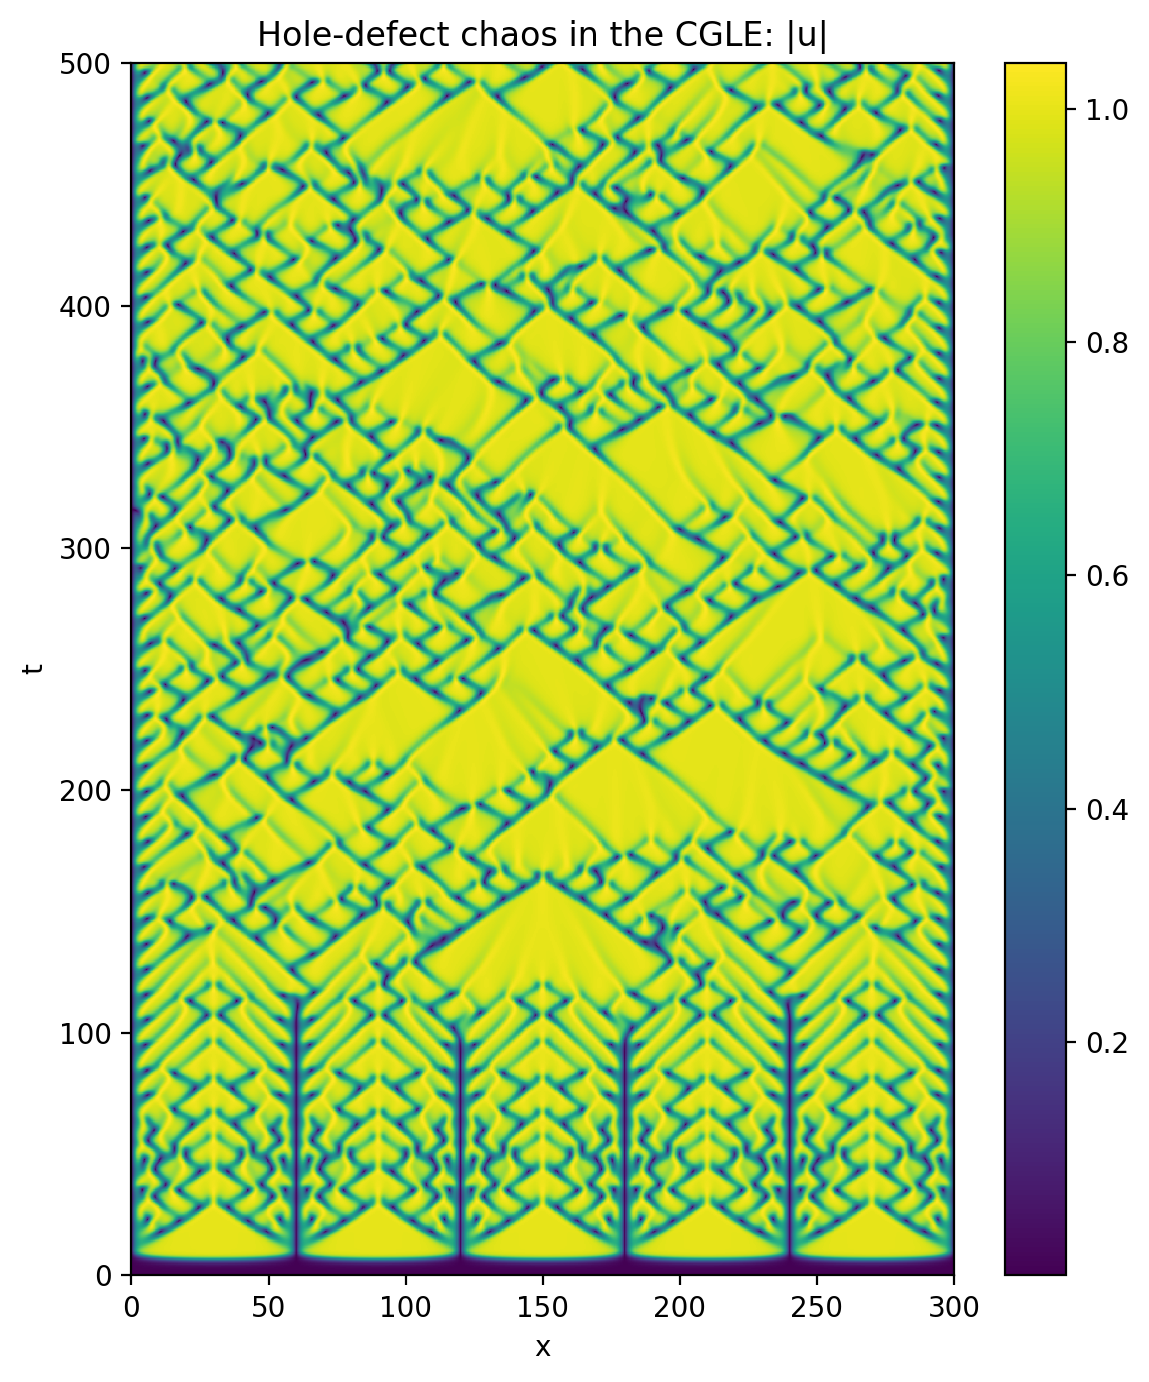

In [49]:
# Plot solution
plt.figure(figsize=(6, 7), dpi=100)
plt.pcolormesh(x, t_array, np.abs(u_array), shading='nearest')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Hole-defect chaos in the CGLE: |u|')
plt.tight_layout()

In [50]:
import pathlib
import subprocess
import h5py
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [52]:
# Clean up any old files
import shutil
shutil.rmtree('analysis', ignore_errors=True)

# Fins i tot lleva els del tutorial anterior

In [53]:
# Repeteix el problema del tutorial anterior... XD
# Basis
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=np.complex128)
xbasis = d3.Chebyshev(xcoord, 1024, bounds=(0, 300), dealias=2)

# Fields
u = dist.Field(name='u', bases=xbasis)
tau1 = dist.Field(name='tau1')
tau2 = dist.Field(name='tau2')

# Substitutions
dx = lambda A: d3.Differentiate(A, xcoord)
magsq_u = u * np.conj(u)
b = 0.5
c = -1.76

# Tau polynomials
tau_basis = xbasis.derivative_basis(2)
p1 = dist.Field(bases=tau_basis)
p2 = dist.Field(bases=tau_basis)
p1['c'][-1] = 1
p2['c'][-2] = 2

# Problem
problem = d3.IVP([u, tau1, tau2], namespace=locals())
problem.add_equation("dt(u) - u - (1 + 1j*b)*dx(dx(u)) + tau1*p1 + tau2*p2 = - (1 + 1j*c) * magsq_u * u")
problem.add_equation("u(x='left') = 0")
problem.add_equation("u(x='right') = 0")

# Solver
solver = problem.build_solver(d3.RK222) # A VEGADES PROBLEMA AMB SOLVER QUE NO ENTENC!!!
solver.stop_sim_time = 500

# Initial conditions
x = dist.local_grid(xbasis)
u['g'] = 1e-3 * np.sin(5 * np.pi * x / 300)

2025-04-16 18:12:25,863 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 8.0e+00/s


In [54]:
# L'objecte per avaluar les equacions durant el timestepping és el 'solver.evaluator'

# 'SystemHandler' object directs the evaluator to evaluate the RHS expressions on every iteration, and uses the data for the explicit part 
# of the timestepping algorithm.

# 'FileHandler' object regularly computes tasks and writes the data to HDF5 files. S'ha d'especificar el nom/path de l'output

# Per control·lar la cadència amb que es fan les avaluacions i es guarden les dades es pot fer de 3 maneres:
# simulation time, specified with sim_dt
# wall time, specified with wall_dt
# iteration number, specified with iter

# Per limitar el nombre de escriptures es pot especificar el màxim de vegades que es vol escriure amb el 'max_writes' keyword argument

analysis = solver.evaluator.add_file_handler('analysis', iter=10, max_writes=400)

# You can add an arbitrary number of file handlers to save different sets of tasks at different cadences and to different files

In [55]:
# Es poden afegir tasques 'add_task' a l'objecte 'analysis' per guardar les dades, entre altres coses.

analysis.add_task(d3.Integrate(np.sqrt(magsq_u),'x')/300, layout='g', name='<|u|>')

In [56]:
# Per fer un checkpoint es pot especificar que es guardin totes les variables d'estat amb el mètode 'add_tasks'

analysis.add_tasks(solver.state, layout='g')

In [57]:
# Ara s'avaluador guarda automàticament sa tasca especificada a sa cadència indicada

print(solver)

# Main loop
timestep = 0.05
while solver.proceed:
    solver.step(timestep)
    if solver.iteration % 1000 == 0:
        print('Completed iteration {}'.format(solver.iteration))

Completed iteration 1000
Completed iteration 2000
Completed iteration 3000
Completed iteration 4000
Completed iteration 5000
Completed iteration 6000
Completed iteration 7000
Completed iteration 8000
Completed iteration 9000


/Users/joanribot/opt/anaconda3/envs/dedalus3/lib/python3.12/site-packages/dedalus/core/evaluator.py:416: SyntaxWarning: invalid escape sequence '\d'
  m = re.match("{}_s(\d+)$".format(base_path.stem), set.stem)


KeyboardInterrupt: 

In [ ]:
# Per guardar la info es crea una carpeta amb el nom que li hem donat en el 'FileHandler'
# Dins la carpeta hi ha els arxius HDF5 per a cada conjunt d'outputs, per exemple: 'analysis_s1.h5'


print(subprocess.check_output("find analysis | sort", shell=True).decode())

# We should see three sets since we have 1000 total outputs with 400 writes per file

analysis
analysis/analysis_s1.h5
analysis/analysis_s2.h5
analysis/analysis_s3.h5



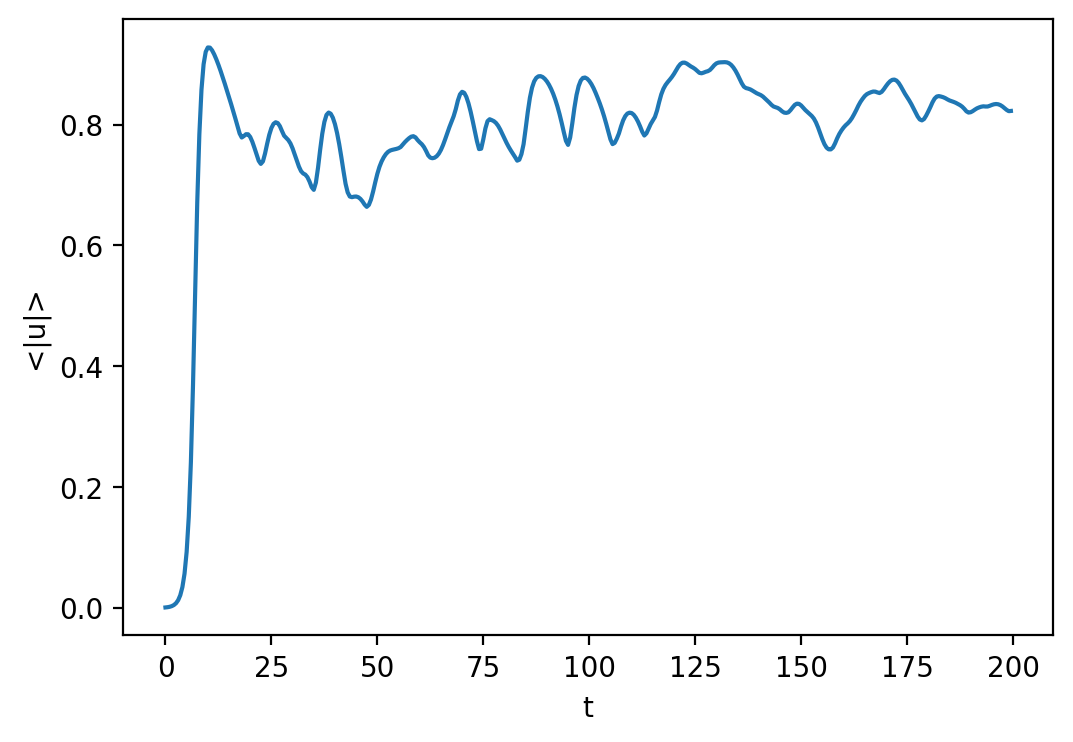

In [ ]:
# Per interactuar amb els fitxers HDF5 es pot fer servir el mòdul h5py:

# The HDF5 datasets are self-describing, with dimensional scales attached to each axis.
# For the first axis, these include the simulation time, wall time, iteration, and write number.
# For the spatial axes, the scales correspond to grid points or modes, based on the task layout.
with h5py.File("analysis/analysis_s1.h5", mode='r') as file:
    # Load datasets
    mag_u = file['tasks']['<|u|>']
    t = mag_u.dims[0]['sim_time']
    # Plot data
    fig = plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(t[:], mag_u[:].real)
    plt.xlabel('t')
    plt.ylabel('<|u|>')

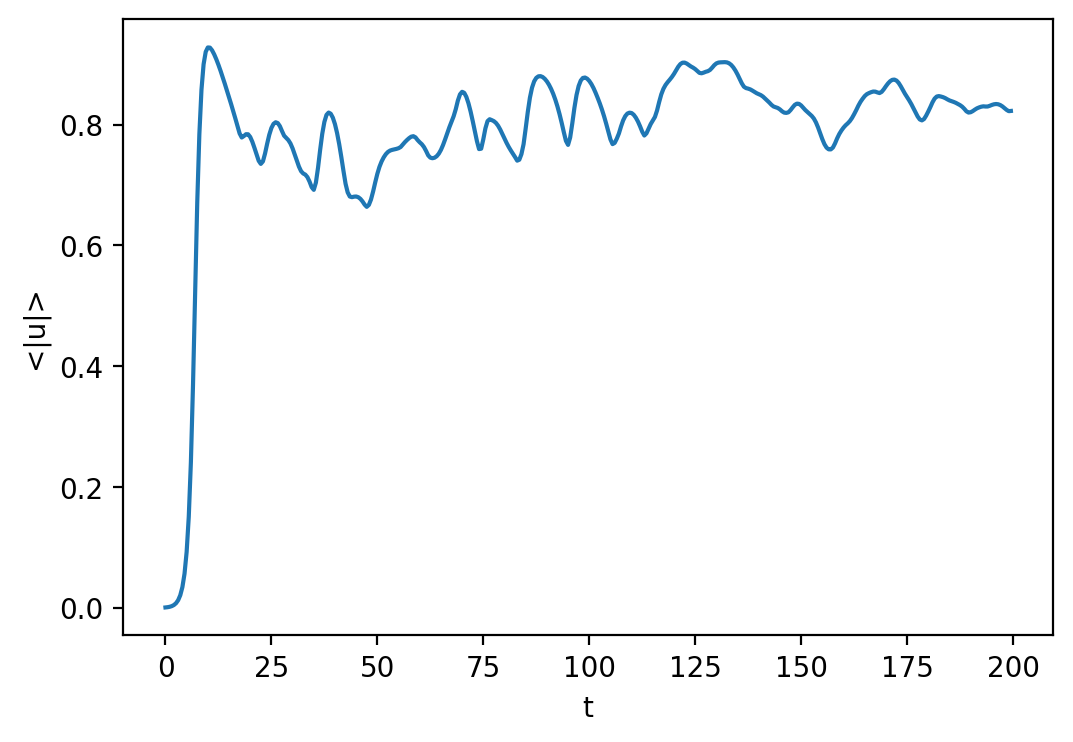

In [ ]:
# Una altra manera d'interactuar amb els arxius HDF5 és amb xarray per carregar les dades a la 'DataArray'

tasks = d3.load_tasks_to_xarray("analysis/analysis_s1.h5")
fig = plt.figure(figsize=(6, 4), dpi=100)
tasks['<|u|>'].real.plot();

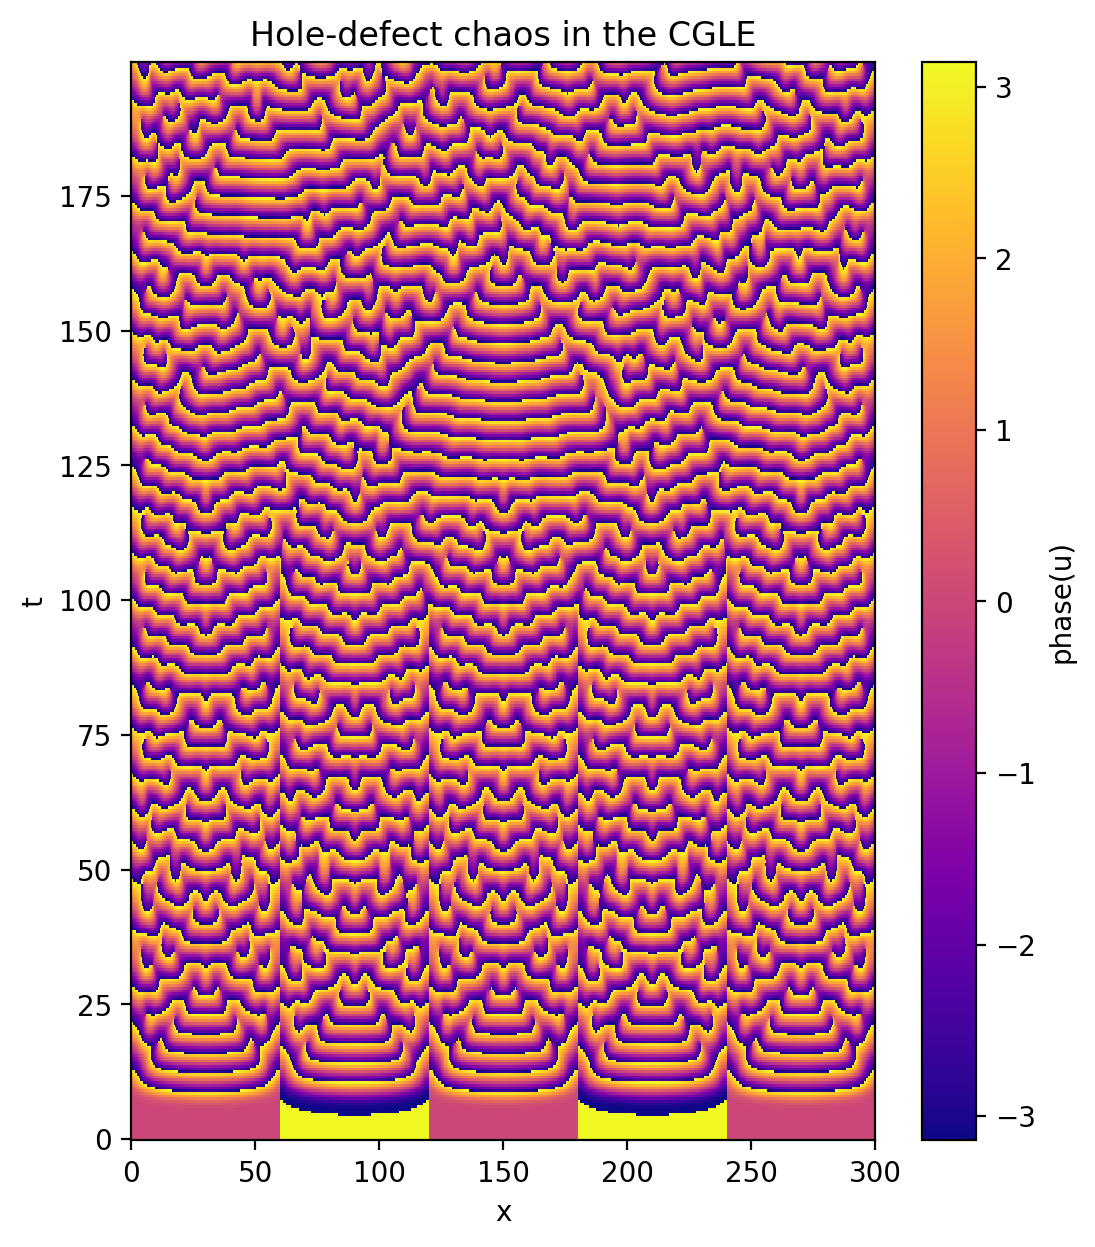

In [ ]:
# Anem a representar l'evolució de la solució en espai i temps. Ara representam l'espai de les fases

with h5py.File("analysis/analysis_s1.h5", mode='r') as file: # Carregam l'arxiu
    # Load datasets
    u = file['tasks']['u']
    t = u.dims[0]['sim_time']
    x = u.dims[1][0]
    # Plot data
    u_phase = np.arctan2(u[:].imag, u[:].real) # Representam la fase
    plt.figure(figsize=(6,7), dpi=100)
    plt.pcolormesh(x[:], t[:], u_phase, shading='nearest', cmap='plasma')
    plt.colorbar(label='phase(u)')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Hole-defect chaos in the CGLE')

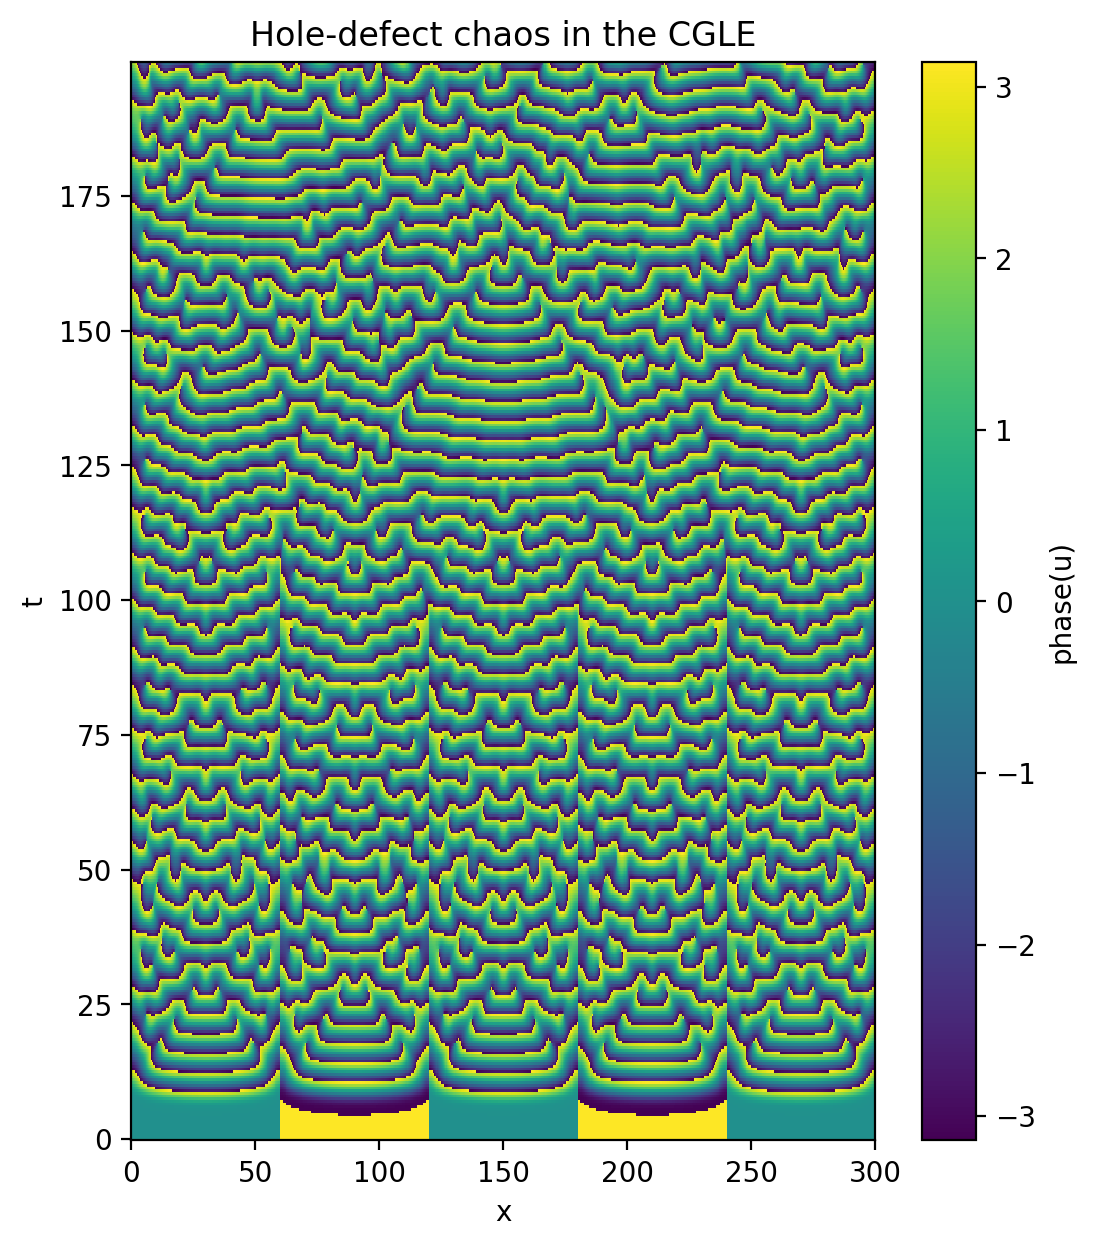

In [ ]:
# També es pot per xarray, que és més fàcil d'usar i més ràpid:
tasks = d3.load_tasks_to_xarray("analysis/analysis_s1.h5")
u_phase = np.arctan2(tasks['u'].imag, tasks['u'].real)
u_phase.name = "phase(u)"

plt.figure(figsize=(6,7), dpi=100)
u_phase.plot(x='x', y='t', cmap='viridis')
plt.title('Hole-defect chaos in the CGLE');